<a href="https://colab.research.google.com/github/Shi-Jiarui/Shi-Jiarui.github.io/blob/master/MPC_first_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install cubo[ee]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 34.9 MB/s eta 0:00:00
  Created wheel for cubo: filename=cubo-2024.8.0-py3-none-any.whl size=10159 sha256=56ffe696299ca52ca73170641de4e703c40a644d088bec9c0fee5571fe786fa0
  Stored in directory: /root/.cache/pip/wheels/71/95/3e/fa574e158158557aaca738c2dec27795bc66c050089f2ee0d2
Successfully built cubo
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [70]:
!pip install --upgrade xee

In [71]:
import ee
service_account = 'shi-jiarui-dukekunshan@ee-shijiarui-dukekunshan.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, './drive/MyDrive/ee-shijiarui-dukekunshan-c6907bc45407.json')
ee.Initialize(credentials,opt_url='https://earthengine-highvolume.googleapis.com')

In [ ]:
import pandas as pd

# 数据定义
data = {
    '地点': ['监测船1（南1）', '监测船2（南2）', '监测船3（西北3）', '监测船4（东北4）',
             '北干河口浮船', '太滆河口浮船', '滆湖北',
             '揽月湾西浮标', '揽月湾中浮标', '揽月湾东浮标'],
    'lon': [119.7866613, 119.7772367, 119.7921459, 119.8162859,
             119.784, 119.851, 119.8465,
             119.8191856, 119.8362337, 119.8598643],
    'lat': [31.53297131, 31.51717563, 31.57217106, 31.56833063,
             31.5848, 31.6197, 31.6343,
             31.67578015, 31.67394837, 31.67510622]
}

# 转换为 Pandas 数据框
df = pd.DataFrame(data)
df['begin_date'] = '2021-01-01'
df['end_date'] = '2024-10-31'
# 显示结果
print(df)


          地点         lon        lat  begin_date    end_date
0   监测船1（南1）  119.786661  31.532971  2021-01-01  2024-10-31
1   监测船2（南2）  119.777237  31.517176  2021-01-01  2024-10-31
2  监测船3（西北3）  119.792146  31.572171  2021-01-01  2024-10-31
3  监测船4（东北4）  119.816286  31.568331  2021-01-01  2024-10-31
4     北干河口浮船  119.784000  31.584800  2021-01-01  2024-10-31
5     太滆河口浮船  119.851000  31.619700  2021-01-01  2024-10-31
6        滆湖北  119.846500  31.634300  2021-01-01  2024-10-31
7     揽月湾西浮标  119.819186  31.675780  2021-01-01  2024-10-31
8     揽月湾中浮标  119.836234  31.673948  2021-01-01  2024-10-31
9     揽月湾东浮标  119.859864  31.675106  2021-01-01  2024-10-31


In [3]:
# import ee
import xarray

In [ ]:
# import pandas as pd
# import numpy as np
# import cubo
# from concurrent.futures import ThreadPoolExecutor

# def process_chunk(df_chunk):
#     """
#     处理一个数据块，计算辐射值（irr）的结果。
#     """
#     results = []
#     for i in range(len(df_chunk)):
#         hour = df_chunk.loc[i, 'time'].hour
#         current_value = df_chunk.loc[i, 'irr']

#         if hour == 1:
#             results.append(current_value / 3600)
#         else:
#             if i > 0:  # 块内非第一行
#                 previous_value = df_chunk.loc[i - 1, 'irr']
#                 results.append((current_value - previous_value) / 3600)
#             else:
#                 # 块的第一行，但因重复值已包含上一块的最后一行，不会出现断点
#                 raise ValueError("块处理的逻辑有误")
#     return results[1:]  # 去掉块内因重复导致的第一个值

# def Get_ERA5_irr_mld_wind(lat, lon, start_date, end_date, chunk_size=1000):
#     # 数据立方体的创建
#     da = cubo.create(
#         lat=lat,
#         lon=lon,
#         collection="ECMWF/ERA5_LAND/HOURLY",  # GEE集合的ID
#         bands=["surface_net_solar_radiation", "lake_mix_layer_depth",
#                "u_component_of_wind_10m", "v_component_of_wind_10m"],  # 要获取的波段
#         start_date=start_date,
#         end_date=end_date,  # 结束日期
#         edge_size=1,
#         resolution=10,
#         fast_time_slicing=True,
#         gee=True  # 设置为True
#     )

#     result_numpy_da = da.compute()
#     irr = result_numpy_da.to_numpy()
#     irr_re = irr.reshape(-1, 4)
#     time1 = da.time.values

#     # 将数据转换为DataFrame
#     df = pd.DataFrame({
#         'time': time1,
#         'irr': irr_re[:, 0],
#         'mld': irr_re[:, 1],
#         'uwind_10': irr_re[:, 2],
#         'vwind_10': irr_re[:, 3]
#     })

#     # 分块处理，增加块间重叠数据
#     num_chunks = int(np.ceil(len(df) / chunk_size))
#     chunks = []
#     for i in range(num_chunks):
#         start_idx = max(i * chunk_size - 1, 0)  # 从上一块的最后一个值开始（第一块无重复）
#         end_idx = min((i + 1) * chunk_size, len(df))
#         chunks.append(df.iloc[start_idx:end_idx])

#     # 使用多线程处理每个块
#     results = []
#     with ThreadPoolExecutor() as executor:
#         futures = [executor.submit(process_chunk, chunk) for chunk in chunks]
#         for future in futures:
#             results.append(future.result())

#     # 合并所有块的结果
#     irr_results = [results[0]] + [res for res in results[1:]]
#     irr_flat = [item for sublist in irr_results for item in sublist]

#     # 将结果添加到 DataFrame 中作为新列
#     df['irr'] = irr_flat

#     return df


In [ ]:

# def calculate_wind_speed_direction(uwind, vwind):
#     """
#     计算风速和风向。
#     风速: sqrt(uwind^2 + vwind^2)
#     风向: arctan2(-uwind, -vwind) 转换为角度，0度表示正北，顺时针增加
#     """
#     speed = np.sqrt(uwind**2 + vwind**2)
#     direction = (np.degrees(np.arctan2(-uwind, -vwind)) + 360) % 360  # 保证风向为正角度
#     return speed, direction

# def process_chunk(df_chunk):
#     """
#     处理一个数据块，计算辐射值（irr）的结果，并计算风速和风向。
#     """
#     results_irr = []
#     wind_speeds = []
#     wind_directions = []

#     for i in range(1, len(df_chunk)):  # Start from 1 to avoid index error when comparing with previous value
#         current_value = df_chunk.loc[i, 'irr']

#         # 计算辐射值
#         previous_value = df_chunk.loc[i - 1, 'irr']
#         results_irr.append((current_value - previous_value) / 3600)  # Calculate radiation rate in W/m²/s

#         # 计算风速和风向
#         uwind = df_chunk.loc[i, 'uwind_10']
#         vwind = df_chunk.loc[i, 'vwind_10']
#         speed, direction = calculate_wind_speed_direction(uwind, vwind)
#         wind_speeds.append(speed)
#         wind_directions.append(direction)

#     return results_irr, wind_speeds, wind_directions


# def Get_ERA5_irr_mld_wind(lat, lon, start_date, end_date, chunk_size=1000):
#     """
#     获取 ERA5 数据并进行辐射值、风速和风向的计算，支持分块处理以降低内存使用。
#     """
#     da = cubo.create(
#         lat=lat,
#         lon=lon,
#         collection="ECMWF/ERA5_LAND/HOURLY",
#         bands=["surface_net_solar_radiation", "lake_mix_layer_depth",
#                "u_component_of_wind_10m", "v_component_of_wind_10m"],
#         start_date=start_date,
#         end_date=end_date,
#         edge_size=1,
#         resolution=10,
#         fast_time_slicing=True,
#         gee=True
#     )

#     result_numpy_da = da.compute()
#     irr = result_numpy_da.to_numpy()
#     irr_re = irr.reshape(-1, 4)
#     time1 = da.time.values

#     df = pd.DataFrame({
#         'time': time1,
#         'irr': irr_re[:, 0],
#         'mld': irr_re[:, 1],
#         'uwind_10': irr_re[:, 2],
#         'vwind_10': irr_re[:, 3]
#     })

#     # 分块处理
#     num_chunks = int(np.ceil(len(df) / chunk_size))
#     chunks = []
#     for i in range(num_chunks):
#         start_idx = max(i * chunk_size - 1, 0)
#         end_idx = min((i + 1) * chunk_size, len(df))
#         chunks.append(df.iloc[start_idx:end_idx])

#     # 多线程处理
#     results_irr, results_speed, results_dir = [], [], []
#     with ThreadPoolExecutor() as executor:
#         futures = [executor.submit(process_chunk, chunk) for chunk in chunks]
#         for future in futures:
#             irr_res, speed_res, dir_res = future.result()
#             results_irr.append(irr_res)
#             results_speed.append(speed_res)
#             results_dir.append(dir_res)

#     # 合并结果
#     irr_flat = [item for sublist in results_irr for item in sublist]
#     wind_speed_flat = [item for sublist in results_speed for item in sublist]
#     wind_dir_flat = [item for sublist in results_dir for item in sublist]

#     # 更新 DataFrame
#     df = df.iloc[1:].reset_index(drop=True)  # 去掉第一个重叠行
#     df['irr'] = irr_flat
#     df['wind_speed_10'] = wind_speed_flat
#     df['wind_dir_10'] = wind_dir_flat

#     return df

# def split_dates(start_date, end_date):
#     dates = []
#     current_date = start_date
#     while current_date < end_date:
#         next_date = min(current_date + timedelta(days=30), end_date)
#         dates.append((current_date, next_date))
#         current_date = next_date
#     return dates

# def process_site(site_no, lat, lon, begin_date, end_date):
#     file_list = []
#     if (end_date - begin_date).days > 30:
#         date_ranges = split_dates(begin_date, end_date)
#         for start, stop in date_ranges:
#             data = Get_ERA5_irr_mld_wind(lat, lon, start.strftime('%Y-%m-%d'), stop.strftime('%Y-%m-%d'))
#             filename = './drive/MyDrive/Chao_Ge_era5/{}_irr_{}_to_{}.csv'.format(
#                 site_no, start.strftime('%Y%m%d'), stop.strftime('%Y%m%d')
#             )
#             data.to_csv(filename, index=False)
#             file_list.append(filename)
#     else:
#         data = Get_ERA5_irr_mld_wind(lat, lon, begin_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
#         filename = './drive/MyDrive/Chao_Ge_era5/{}_irr.csv'.format(site_no)
#         data.to_csv(filename, index=False)
#         file_list.append(filename)
#     return site_no, file_list

# def process_sites_multithread(new_df):
#     results = []
#     with ThreadPoolExecutor(max_workers=4) as executor:
#         futures = []
#         for index, row in new_df.iterrows():
#             site_no = row['地点']
#             lat = row['lat']
#             lon = row['lon']
#             begin_date = pd.to_datetime(row['begin_date'])
#             end_date = pd.to_datetime(row['end_date'])
#             futures.append(executor.submit(process_site, site_no, lat, lon, begin_date, end_date))

#         for future in tqdm(as_completed(futures), total=len(futures), desc="Processing Sites"):
#             try:
#                 site_no, files = future.result()
#                 print(f"Site {site_no} finished. Generated files: {files}")
#                 results.append((site_no, files))
#             except Exception as e:
#                 print(f"Error processing site {site_no}: {e}")
#     return results

# # # 示例 DataFrame
# # df = pd.DataFrame({
# #     '地点': ['site1', 'site2'],
# #     'lat': [31.5, 32.1],
# #     'long': [119.8, 120.2],
# #     'begin_date': ['2023-01-01', '2023-02-01'],
# #     'end_date': ['2023-03-01', '2023-03-15']
# # })
# directory = './drive/MyDrive/Chao_Ge_era5'
# if not os.path.exists(directory):
#     os.makedirs(directory)
# # 执行多线程处理
# results = process_sites_multithread(df)


Processing Sites:   0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import cubo
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm.notebook import tqdm
from datetime import timedelta
import os
def Get_ERA5_irr_mld_wind(lat,lon,start_date,end_date):
    da = cubo.create(
        lat=lat,
        lon=lon,
    collection="ECMWF/ERA5_LAND/HOURLY", # ID of the GEE collection
    bands=["surface_net_solar_radiation","lake_mix_layer_depth","u_component_of_wind_10m","v_component_of_wind_10m"], # Bands to retrieve
    start_date=start_date,
    end_date=end_date, # End date of the cube (remember in GEE this date is not included)
    edge_size=1,
    resolution=10,
    fast_time_slicing=True,
    gee=True # Set to True
    )

    result_numpy_da = da.compute()
    irr = result_numpy_da.to_numpy()
    irr_re = irr.reshape(-1, 4)
    time1 = da.time.values

    df = pd.DataFrame({
        'time': time1,
        'irr': irr_re[:, 0],
        'mld': irr_re[:, 1],
        'uwind_10': irr_re[:, 2],
        'vwind_10': irr_re[:, 3]
    })

    irr_re = None
    irr = None


    # 创建新列来存储计算结果
    result = []

    for i in range(len(df)):
        # 获取当前行的小时数
        hour = df.loc[i, 'time'].hour
        # 获取当前行的辐射值
        current_value = df.loc[i, 'irr']

        if hour == 1:
            # 小时为 1，直接除以 3600
            result.append(current_value / 3600)
        else:
            # 小时不为 1，减去上一个值再除以 4800
            if i > 0:  # 确保不是第一行
                previous_value = df.loc[i - 1, 'irr']
                result.append((current_value - previous_value) / 3600)
            else:
                # 如果是第一行，没有上一个值，可以选择填充 NaN 或 0
                result.append(None)  # 这里使用 None，表示缺失值

    # 将结果添加到 DataFrame 中作为新列
    df['irr'] = result
    return df
from tqdm.notebook import tqdm
import pandas as pd
from datetime import timedelta

def split_dates(start_date, end_date):
    # 将开始和结束日期之间的时间以每个月为单位分段
    dates = []
    current_date = start_date
    while current_date < end_date:
        next_date = min(current_date + timedelta(days=30), end_date)
        dates.append((current_date, next_date))
        current_date = next_date
    return dates

# for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Sites"):

#     site_no = row['地点']
#     lat = row['lat']
#     lon = row['lon']
#     begin_date = pd.to_datetime(row['begin_date'])
#     end_date = pd.to_datetime(row['end_date'])

#     # 检查时间差是否超过1个月
#     if (end_date - begin_date).days > 30:
#         # 分段处理每个月的时间
#         date_ranges = split_dates(begin_date, end_date)
#         for start, stop in date_ranges:
#             data = Get_ERA5_irr_mld_wind(lat, lon, start.strftime('%Y-%m-%d'), stop.strftime('%Y-%m-%d'))
#             # 输出文件名包含站点编号和时间段
#             filename = './drive/MyDrive/Chao_Ge_era5/{}_irr_{}_to_{}.csv'.format(
#                 site_no, start.strftime('%Y%m%d'), stop.strftime('%Y%m%d')
#             )
#             data.to_csv(filename)
#         print("{}_{}_finish.".format(index,site_no) )
#     else:
#         # 如果时间不超过1个月，直接处理
#         data = Get_ERA5_irr_mld_wind(lat, lon, begin_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
#         data.to_csv('./drive/MyDrive/Chao_Ge_era5/{}_irr.csv'.format(site_no))
#         print("{}_{}_finish.".format(index,site_no) )

Processing Sites:   0%|          | 0/10 [00:00<?, ?it/s]

0_监测船1（南1）_finish.
1_监测船2（南2）_finish.


2_监测船3（西北3）_finish.


3_监测船4（东北4）_finish.
4_北干河口浮船_finish.
5_太滆河口浮船_finish.
6_滆湖北_finish.


7_揽月湾西浮标_finish.
8_揽月湾中浮标_finish.


9_揽月湾东浮标_finish.


In [ ]:
import pandas as pd

# 站点信息
data = {
    '站点': ['兆河入湖区', '忠庙', '东半湖湖心', '巢湖船厂', '西半湖湖心', '新河入湖区', '黄麓', '湖滨'],
    'lon': [117.5605, 117.4696, 117.62, 117.7559, 117.3725, 117.3832, 117.6331, 117.4203],
    'lat': [31.4726, 31.5658, 31.522, 31.6019, 31.6527, 31.5674, 31.5778, 31.6461]
}

# 创建 DataFrame
df2 = pd.DataFrame(data)
df2['begin_date'] = '2021-01-01'
df2['end_date'] = '2024-10-31'
# 输出 DataFrame
print(df2)
for index, row in tqdm(df2.iterrows(), total=len(df2), desc="Processing Sites"):

    site_no = row['站点']
    lat = row['lat']
    lon = row['lon']
    begin_date = pd.to_datetime(row['begin_date'])
    end_date = pd.to_datetime(row['end_date'])

    # 检查时间差是否超过1个月
    if (end_date - begin_date).days > 30:
        # 分段处理每个月的时间
        date_ranges = split_dates(begin_date, end_date)
        for start, stop in date_ranges:
            data = Get_ERA5_irr_mld_wind(lat, lon, start.strftime('%Y-%m-%d'), stop.strftime('%Y-%m-%d'))
            # 输出文件名包含站点编号和时间段
            filename = './drive/MyDrive/Chao_Ge_era5/{}_irr_{}_to_{}.csv'.format(
                site_no, start.strftime('%Y%m%d'), stop.strftime('%Y%m%d')
            )
            data.to_csv(filename)
        print("{}_{}_finish.".format(index,site_no) )
    else:
        # 如果时间不超过1个月，直接处理
        data = Get_ERA5_irr_mld_wind(lat, lon, begin_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
        data.to_csv('./drive/MyDrive/Chao_Ge_era5/{}_irr.csv'.format(site_no))
        print("{}_{}_finish.".format(index,site_no) )

      站点       lon      lat  begin_date    end_date
0  兆河入湖区  117.5605  31.4726  2021-01-01  2024-10-31
1     忠庙  117.4696  31.5658  2021-01-01  2024-10-31
2  东半湖湖心  117.6200  31.5220  2021-01-01  2024-10-31
3   巢湖船厂  117.7559  31.6019  2021-01-01  2024-10-31
4  西半湖湖心  117.3725  31.6527  2021-01-01  2024-10-31
5  新河入湖区  117.3832  31.5674  2021-01-01  2024-10-31
6     黄麓  117.6331  31.5778  2021-01-01  2024-10-31
7     湖滨  117.4203  31.6461  2021-01-01  2024-10-31


Processing Sites:   0%|          | 0/8 [00:00<?, ?it/s]

0_兆河入湖区_finish.
1_忠庙_finish.
2_东半湖湖心_finish.
3_巢湖船厂_finish.
4_西半湖湖心_finish.
5_新河入湖区_finish.


6_黄麓_finish.
7_湖滨_finish.


In [ ]:
S2 = (ee.ImageCollection('"ECMWF/ERA5_LAND/HOURLY"')
    .filterBounds(ee.Geometry.Point(13.379491178028564,47.848151988493385))
    .filterDate('2021-06-01','2021-07-01')
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)))
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection=S2, # ee.ImageCollection object
    bands=['B2','B3','B4'], # Bands to retrieve
    start_date='2021-06-01',
    end_date='2021-07-01', # End date of the cube (remember in GEE this date is not included)
    edge_size=64,
    resolution=10,
    gee=True # Set to True
)
da

In [ ]:
import os

output_folder = './drive/MyDrive/Chao_Ge_era5'
zip_file_path = './drive/MyDrive/Chao_Ge_era5.zip'

# 打包文件夹
!zip -r {zip_file_path} {output_folder}

  adding: drive/MyDrive/Chao_Ge_era5/ (stored 0%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船2（南2）_irr_20210101_to_20210131.csv (deflated 69%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船3（西北3）_irr_20210101_to_20210131.csv (deflated 68%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船1（南1）_irr_20210101_to_20210131.csv (deflated 69%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船4（东北4）_irr_20210101_to_20210131.csv (deflated 68%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船2（南2）_irr_20210131_to_20210302.csv (deflated 67%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船1（南1）_irr_20210131_to_20210302.csv (deflated 67%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船3（西北3）_irr_20210131_to_20210302.csv (deflated 65%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船4（东北4）_irr_20210131_to_20210302.csv (deflated 65%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船2（南2）_irr_20210302_to_20210401.csv (deflated 68%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船1（南1）_irr_20210302_to_20210401.csv (deflated 68%)
  adding: drive/MyDrive/Chao_Ge_era5/监测船3（西北3）

In [ ]:
# import planetary_computer

In [ ]:
# !pip install virtualenv  # Install virtualenv if not already available
# !python -m virtualenv cubo_mpc  # Create a virtual environment named 'myenv'
# !source myenv/bin/activate  # Activate the virtual environment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 26.6 MB/s eta 0:00:00
created virtual environment CPython3.10.13.final.0-64 in 1096ms
  creator CPython3Posix(dest=/content/cubo_mpc, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.0, setuptools==69.5.1, wheel==0.43.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
/bin/bash: line 1: myenv/bin/activate: No such file or directory


In [ ]:
import pystac_client
import planetary_computer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1",
                   modifier=planetary_computer.sign_inplace)

time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

/usr/local/lib/python3.10/dist-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


8

In [ ]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [-122.2751, 47.5469],
            [-121.9613, 47.9613],
            [-121.9613, 47.9613],
            [-122.2751, 47.9613],
            [-122.2751, 47.5469],
        ]
    ],
}

time_range = "2020-12-01/2020-12-31"

search = catalog.search(
    collections=["landsat-c2-l2"], intersects=area_of_interest, datetime=time_range
)

In [ ]:
len(items)

8

In [ ]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((-122.72549 48.50884, -120.29248 48.0...",30,2022-05-06T18:04:17.126358Z,10.5066/P9OGBGM6,2020-12-29T18:55:56.738265Z,landsat-8,32610,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80460272020364LGN00,046,2,162.253231,L2SP,17.458298,100.00,02,T2
1,"POLYGON ((-124.52046 48.44245, -121.93932 48.0...",30,2022-05-06T17:25:29.626986Z,10.5066/P9C7I13B,2020-12-28T18:20:32.609164Z,landsat-7,32610,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],...,027,LE70470272020363EDC00,047,2,152.689113,L2SP,14.678880,32.00,02,T1
2,"POLYGON ((-122.96802 48.44547, -120.39024 48.0...",30,2022-05-06T18:01:04.319403Z,10.5066/P9C7I13B,2020-12-21T18:14:50.812768Z,landsat-7,32610,"[7251, 8251]",Landsat Collection 2 Level-2,[etm+],...,027,LE70460272020356EDC00,046,2,153.649177,L2SP,14.779612,24.00,02,T2
3,"POLYGON ((-124.27547 48.50831, -121.84167 48.0...",30,2022-05-06T17:46:22.246696Z,10.5066/P9OGBGM6,2020-12-20T19:02:09.878796Z,landsat-8,32610,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80470272020355LGN00,047,2,163.360118,L2SP,17.414441,100.00,02,T2
4,"POLYGON ((-122.72996 48.50858, -120.2969 48.07...",30,2022-05-06T18:04:16.935800Z,10.5066/P9OGBGM6,2020-12-13T18:56:00.096447Z,landsat-8,32610,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80460272020348LGN00,046,2,164.126188,L2SP,17.799744,98.64,02,T2
5,"POLYGON ((-124.51935 48.44597, -121.93965 48.0...",30,2022-05-06T17:25:29.412798Z,10.5066/P9C7I13B,2020-12-12T18:21:42.991249Z,landsat-7,32610,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],...,027,LE70470272020347EDC00,047,2,154.692691,L2SP,15.427422,12.00,02,T1
6,"POLYGON ((-122.98709 48.4479, -120.40945 48.06...",30,2022-05-06T18:01:04.178839Z,10.5066/P9C7I13B,2020-12-05T18:16:03.755599Z,landsat-7,32610,"[7281, 8251]",Landsat Collection 2 Level-2,[etm+],...,027,LE70460272020340EDC00,046,2,155.308739,L2SP,16.313570,2.00,02,T1
7,"POLYGON ((-124.27385 48.50833, -121.83965 48.0...",30,2022-05-06T17:46:22.097338Z,10.5066/P9OGBGM6,2020-12-04T19:02:11.194486Z,landsat-8,32610,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC80470272020339LGN00,047,2,164.914060,L2SP,18.807230,1.90,02,T1


In [ ]:
# !pip install odc.stac

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.4 MB/s eta 0:00:00


# Xee  cubo


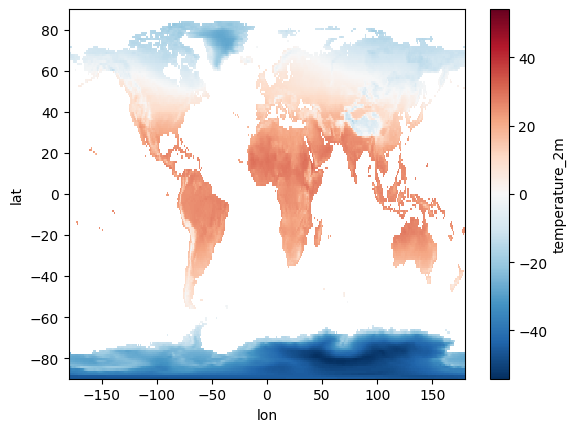

In [6]:
climate = (ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY_AGGR')
    .filterDate('1960', '2020'))

ds = xarray.open_dataset(
    climate,
    engine='ee',
    scale=1,
    crs='EPSG:4326',
    geometry=ee.Geometry.Rectangle([-180, -90, 180, 90]),
)

deg_c = ds['temperature_2m'] - 273.15
mean_deg_c = deg_c.mean(dim='time', skipna=True)
mean_deg_c.transpose().plot()

In [9]:
# import xarray as xr
# 示例代码
import xarray as xr
S2 = (ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR")
    .filterBounds(ee.Geometry.Point(13.379491178028564,47.848151988493385))
    .filterDate('1984-01-01','1985-07-01')
)

# 日期列表
# dates = ['1984-02-03', '1984-03-03', '1984-04-03', '1984-05-03']

# # 定义一个函数来筛选特定日期的影像
# def filter_by_date(image):
#     date = ee.Date(image.get('system:time_start'))
#     date_str = date.format('yyyy-MM-dd')

#     # 检查影像的日期是否在给定日期列表中
#     is_selected_date = ee.List(dates).contains(date_str)

#     # 将布尔值转换为数字 (True -> 1, False -> 0)
#     mask = ee.Image.constant(ee.Number(is_selected_date)).mask()  # 使用数字常量创建掩膜

#     # 仅保留日期匹配的影像
#     return image.updateMask(mask)

# 应用过滤器，选择特定日期的影像
# filtered_S2 = S2.map(filter_by_date)
ds_year = xr.open_dataset(
    S2,
    engine='ee',
    crs='EPSG:4326'
    # geometry=pt,
    # crs=crs,
)

# da = cubo.create(
#     lat=47.848151988493385,
#     lon=13.379491178028564,
#     collection=filtered_S2, # ee.ImageCollection object
#     bands=['lake_mix_layer_depth'], # Bands to retrieve
#     start_date='1984-01-01',
#     end_date='2025-07-01', # End date of the cube (remember in GEE this date is not included)
#     edge_size=1,
#     resolution=30,
#     gee=True # Set to True
# )
ds_year

<xarray.Dataset> Size: 21GB
Dimensions:                                                    (time: 547,
                                                                lon: 360,
                                                                lat: 180)
Coordinates:
  * time                                                       (time) datetime64[ns] 4kB ...
  * lon                                                        (lon) float64 3kB ...
  * lat                                                        (lat) float64 1kB ...
Data variables: (12/150)
    dewpoint_temperature_2m                                    (time, lon, lat) float32 142MB ...
    temperature_2m                                             (time, lon, lat) float32 142MB ...
    skin_temperature                                           (time, lon, lat) float32 142MB ...
    soil_temperature_level_1                                   (time, lon, lat) float32 142MB ...
    soil_temperature_level_2                                   (time, lon, lat) float32 142MB ...
    soil_temperature_level_3                                   (time, lon, lat) float32 142MB ...
    ...                                                         ...
    total_precipitation_min                                    (time, lon, lat) float32 142MB ...
    total_precipitation_max                                    (time, lon, lat) float32 142MB ...
    leaf_area_index_high_vegetation_min                        (time, lon, lat) float32 142MB ...
    leaf_area_index_high_vegetation_max                        (time, lon, lat) float32 142MB ...
    leaf_area_index_low_vegetation_min                         (time, lon, lat) float32 142MB ...
    leaf_area_index_low_vegetation_max                         (time, lon, lat) float32 142MB ...
Attributes:
    crs:      EPSG:4326

In [10]:
def k_to_c(image):
   return image.select().addBands(image.subtract(273.15))

def add_month_attribute(image):
   month = image.date().get('month')
   return image.set('month', month)

deg_c = (ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY_AGGR')
   .filterDate('1960', '2020')
   .select('temperature_2m')
   .map(k_to_c)
   .map(add_month_attribute))

deg_c_by_month = deg_c.distinct('month')

filter = ee.Filter.equals(leftField='month', rightField='month')
join = ee.Join.saveAll('month_match')
deg_c_by_month = join.apply(deg_c_by_month, deg_c, filter)

def get_month_mean_across_years(image):
   deg_c_mean = ee.ImageCollection.fromImages(image.get('month_match')).mean()
   return deg_c_mean.set('month', image.get('month'))

deg_c_by_month = deg_c_by_month.map(get_month_mean_across_years)

ds = xarray.open_dataset(
   ee.ImageCollection(deg_c_by_month),
   engine='ee',
   scale=1,
   crs='EPSG:4326',
   geometry=ee.Geometry.Rectangle([-180, -90, 180, 90]),
)

mean_deg_c = ds['temperature_2m']
mean_deg_c

/usr/local/lib/python3.11/dist-packages/xee/ext.py:688: UserWarning: Unable to retrieve 'system:time_start' values from an ImageCollection due to: No 'system:time_start' values found in the 'ImageCollection'.
  warnings.warn(


<xarray.DataArray 'temperature_2m' (time: 12, lon: 360, lat: 180)> Size: 3MB
[777600 values with dtype=float32]
Coordinates:
  * time     (time) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    id:             temperature_2m
    data_type:      {'type': 'PixelType', 'precision': 'double'}
    crs:            EPSG:4326
    crs_transform:  [1, 0, 0, 0, 1, 0]

In [35]:


def L45L7Valid(image):
    pixel_qa = image.select('QA_PIXEL')
    radsat_qa = image.select('QA_RADSAT')

    b3 = pixel_qa.bitwiseAnd(1 << 3).eq(0)

    b6 = pixel_qa.bitwiseAnd(1 << 6).eq(1 << 6)
    b7 = pixel_qa.bitwiseAnd(1 << 7).eq(1 << 7)
    h1 = b6.And(b7).Not()

    b0 = radsat_qa.bitwiseAnd(1).eq(0)
    valid = b3.And(h1).And(b0).eq(1).rename('valid')
    return image.addBands(valid)

def L8Valid(image):
    pixel_qa = image.select('QA_PIXEL')
    radsat_qa = image.select('QA_RADSAT')

    b3 = pixel_qa.bitwiseAnd(1 << 3).eq(0)

    b6 = pixel_qa.bitwiseAnd(1 << 6).eq(1 << 6)
    b7 = pixel_qa.bitwiseAnd(1 << 7).eq(1 << 7)
    h1 = b6.And(b7).Not()

    b8 = pixel_qa.bitwiseAnd(1 << 8).eq(1 << 9)
    b9 = pixel_qa.bitwiseAnd(1 << 9).eq(1 << 9)
    h2 = b8.And(b9).Not()

    b0 = radsat_qa.bitwiseAnd(1).eq(0)

    valid = b3.And(h1).And(h2).And(b0).eq(1).rename('valid')
    return image.addBands(valid)

def merge_collections_std_bandnames_collection1tier1():
    # 定义波段映射关系

    bn89 = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'valid']
    bn7 = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'valid']
    bn45 = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'valid']
    bns = ['blue', 'green', 'red', 'nir', 'swir', 'valid']

    # Landsat 5 Tier1
    ls51 = (ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")
            .filterBounds(ee.Geometry.Point([116.0, 39.9]))
            .map(L45L7Valid)
            .select(bn45, bns))

    # # Landsat 4 Tier1
    # ls41 = (ee.ImageCollection("LANDSAT/LT04/C01/T1_SR")
    #         .map(L45L7Valid)
    #         .select(bn45, bns))

    # Landsat 7 Tier1（包含时间过滤）
    ls71 = (ee.ImageCollection("LANDSAT/LE07/C02/T1_L2")
            .filterDate('1999-01-01', '2003-01-01')
            .filterBounds(ee.Geometry.Point([116.0, 39.9]))
            .map(L45L7Valid)
            .select(bn7, bns))

    # Landsat 8 Tier1
    ls81 = (ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
            .filterBounds(ee.Geometry.Point([116.0, 39.9]))
            .map(L8Valid)
            .select(bn89, bns))
        # Landsat 8 Tier1
    ls91 = (ee.ImageCollection("LANDSAT/LC09/C02/T1_L2")
            .filterBounds(ee.Geometry.Point([116.0, 39.9]))
            .map(L8Valid)
            .select(bn89, bns))

    # # Landsat 4 Tier2
    # ls42 = (ee.ImageCollection("LANDSAT/LT04/C01/T2_SR")
    #         .map(L45L7Valid)
    #         .select(bn45, bns))

    # # Landsat 5 Tier2
    # ls52 = (ee.ImageCollection("LANDSAT/LT05/C01/T2_SR")
    #         .map(L45L7Valid)
    #         .select(bn45, bns))

    # # Landsat 7 Tier2（包含时间过滤）
    # ls72 = (ee.ImageCollection("LANDSAT/LE07/C01/T2_SR")
    #         .filterDate('1999-01-01', '2003-01-01')
    #         .map(L45L7Valid)
    #         .select(bn7, bns))

    # # Landsat 8 Tier2
    # ls82 = (ee.ImageCollection("LANDSAT/LC08/C01/T2_SR")
    #         .map(L8Valid)
    #         .select(bn8, bns))

    # 合并所有数据集
    merged = (ls51.merge(ls71)
               .merge(ls81)).merge(ls91)
              #  .merge(ls72)
              #  .merge(ls82)
              #  .merge(ls52)
              #  .merge(ls42)
              #  .merge(ls41))

    return merged
merged_collection = merge_collections_std_bandnames_collection1tier1()

# 过滤时间和空间范围
filtered = merged_collection.filterDate('1984-01-01', '2025-01-01').filterBounds(ee.Geometry.Point([116.0, 39.9]))


ds_t = xarray.open_dataset(
   ee.ImageCollection(filtered),
   engine='ee',
  #  scale=1,
   crs='EPSG:4326',
   geometry=ee.Geometry.Point([116.0, 39.9]),
)
ds_t

{'type': 'Image', 'bands': [{'id': 'blue', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7891, 7151], 'crs': 'EPSG:32650', 'crs_transform': [30, 0, 360585, 0, -30, 4570215]}, {'id': 'green', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7891, 7151], 'crs': 'EPSG:32650', 'crs_transform': [30, 0, 360585, 0, -30, 4570215]}, {'id': 'red', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7891, 7151], 'crs': 'EPSG:32650', 'crs_transform': [30, 0, 360585, 0, -30, 4570215]}, {'id': 'nir', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7891, 7151], 'crs': 'EPSG:32650', 'crs_transform': [30, 0, 360585, 0, -30, 4570215]}, {'id': 'swir', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7891, 7151], 'crs': 'EPSG:32650', 'crs_transform': [30, 0, 360585, 0, -30, 4570

<xarray.Dataset> Size: 53kB
Dimensions:  (time: 1644, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 13kB 1984-05-12T02:21:01.445000 ... 2024-1...
  * lon      (lon) float64 8B 116.5
  * lat      (lat) float64 8B 40.4
Data variables:
    blue     (time, lon, lat) float32 7kB ...
    green    (time, lon, lat) float32 7kB ...
    red      (time, lon, lat) float32 7kB ...
    nir      (time, lon, lat) float32 7kB ...
    swir     (time, lon, lat) float32 7kB ...
    valid    (time, lon, lat) float32 7kB ...
Attributes:
    crs:      EPSG:4326

In [36]:
# ds_t['vaild'].values
# 获取温度变量
temperature = ds_t["valid"]

# 转换为 NumPy 数组并处理
temp_values = temperature.values
temp_values

array([[[ 1.]],

       [[ 0.]],

       [[ 1.]],

       ...,

       [[nan]],

       [[nan]],

       [[nan]]], dtype=float32)

In [37]:
import numpy as np


# ---------------------------------------------------
# 步骤 1：扁平化数组（忽略维度）
# ---------------------------------------------------
flat_arr = temp_values.ravel()  # 将多维数组压缩成一维

# ---------------------------------------------------
# 步骤 2：统计 NaN 数量
# ---------------------------------------------------
nan_count = np.isnan(flat_arr).sum()

# ---------------------------------------------------
# 步骤 3：统计有效数据中的 0 和 1 数量
# ---------------------------------------------------
valid_data = flat_arr[~np.isnan(flat_arr)]  # 过滤 NaN
zero_count = (valid_data == 0).sum()
one_count = (valid_data == 1).sum()

# ---------------------------------------------------
# 步骤 4：输出统计结果
# ---------------------------------------------------
print(f"数值分布统计:")
print(f"- 0 的数量: {zero_count}")
print(f"- 1 的数量: {one_count}")
print(f"- NaN 的数量: {nan_count}")
print(f"- 有效数据总数: {len(valid_data)}")
print(f"- 无效数据占比: {nan_count / len(flat_arr):.1%}")

数值分布统计:
- 0 的数量: 238
- 1 的数量: 579
- NaN 的数量: 827
- 有效数据总数: 817
- 无效数据占比: 50.3%


In [72]:
# def merge_collections_std_bandnames_collection1tier1():
#     # 定义波段映射关系

#     bn89 = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'valid']
#     bn7 = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'valid']
#     bn45 = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'valid']
#     bns = ['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2']

#     # Landsat 5 Tier1
#     ls51 = (ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")
#             .filterBounds(ee.Geometry.Point([116.0, 39.9]))
#             .map(L45L7Valid)
#             .select(bn45, bns))

#     # # Landsat 4 Tier1
#     # ls41 = (ee.ImageCollection("LANDSAT/LT04/C01/T1_SR")
#     #         .map(L45L7Valid)
#     #         .select(bn45, bns))

#     # Landsat 7 Tier1（包含时间过滤）
#     ls71 = (ee.ImageCollection("LANDSAT/LE07/C02/T1_L2")
#             .filterDate('1999-01-01', '2003-01-01')
#             .filterBounds(ee.Geometry.Point([116.0, 39.9]))
#             .map(L45L7Valid)
#             .select(bn7, bns))

#     # Landsat 8 Tier1
#     ls81 = (ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
#             .filterBounds(ee.Geometry.Point([116.0, 39.9]))
#             .map(L8Valid)
#             .select(bn89, bns))
#         # Landsat 8 Tier1
#     ls91 = (ee.ImageCollection("LANDSAT/LC09/C02/T1_L2")
#             .filterBounds(ee.Geometry.Point([116.0, 39.9]))
#             .map(L8Valid)
#             .select(bn89, bns))


#     merged = (ls51.merge(ls71)
#                .merge(ls81)).merge(ls91)
#               #  .merge(ls72)
#               #  .merge(ls82)
#               #  .merge(ls52)
#               #  .merge(ls42)
#               #  .merge(ls41))

#     return merged
# merged_collection = merge_collections_std_bandnames_collection1tier1()
# 目标经纬度
longitude, latitude = 119.85, 34.91  # 替换为你的坐标
point = ee.Geometry.Point([longitude, latitude])

# 定义时间范围
start_date = '1984-01-01'
end_date = '2024-12-31'

# 反射率和温度校正参数
SR_SCALE_FACTOR = 0.0000275
SR_OFFSET = -0.2
TEMP_SCALE_FACTOR = 0.00341802
TEMP_OFFSET = 149.0

# 处理 Landsat 影像
def process_landsat(image, band_map):
    """ 先筛选水体像素，再计算反射率和温度 """

    # 筛选水体像素
    qa_pixel = image.select('QA_PIXEL')
    water_mask = qa_pixel.bitwiseAnd(1 << 7).neq(0)  # 水体
    cloud_mask = qa_pixel.bitwiseAnd(1 << 3).eq(0)   # 无云
    shadow_mask = qa_pixel.bitwiseAnd(1 << 4).eq(0)  # 无阴影
    water_only = image.updateMask(water_mask.And(cloud_mask).And(shadow_mask))

    # 服务器端重命名波段
    water_only = water_only.select(list(band_map.keys()), list(band_map.values()))

    # 反射率校正
    sr_bands = water_only.select(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2'],).multiply(SR_SCALE_FACTOR).add(SR_OFFSET)

    # 温度校正（开尔文转摄氏度）
    temperature_celsius = water_only.select('Thermal').multiply(TEMP_SCALE_FACTOR).add(TEMP_OFFSET).subtract(273.15)

    return water_only.addBands(sr_bands.rename(['Blue_Rrs', 'Green_Rrs', 'Red_Rrs', 'NIR_Rrs', 'SWIR1_Rrs', 'SWIR2'])).addBands(temperature_celsius.rename('Temperature_Celsius'))

# 处理 Landsat 5
landsat5_band_map = {
    'SR_B1': 'Blue', 'SR_B2': 'Green', 'SR_B3': 'Red', 'SR_B4': 'NIR',
    'SR_B5': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B6': 'Thermal'
}
landsat5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat5_band_map))

# 处理 Landsat 7
landsat7_band_map = landsat5_band_map  # Landsat 5 和 7 波段相同
landsat7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat7_band_map))

# 处理 Landsat 8
landsat8_band_map = {
    'SR_B2': 'Blue', 'SR_B3': 'Green', 'SR_B4': 'Red', 'SR_B5': 'NIR',
    'SR_B6': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B10': 'Thermal'
}
landsat8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# 处理 Landsat 9
landsat9_band_map = landsat8_band_map  # Landsat 8 和 9 波段相同
landsat9 = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# # 合并所有 Landsat 影像
# landsat_collection = landsat5.merge(landsat7).merge(landsat8)
landsat_collection = landsat5.merge(landsat7).merge(landsat8).merge(landsat9)
ds_t_all = xarray.open_dataset(
   ee.ImageCollection(landsat_collection),
   engine='ee',
  #  scale=0.001,
   crs='EPSG:4326',
  geometry=point ,
)
ds_t_all
# longitude, latitude = 110.0, 30.0  # 替换为你的坐标

<xarray.Dataset> Size: 71kB
Dimensions:              (time: 1102, lon: 1, lat: 1)
Coordinates:
  * time                 (time) datetime64[ns] 9kB 1984-05-07T02:03:54.382000...
  * lon                  (lon) float64 8B 120.3
  * lat                  (lat) float64 8B 35.41
Data variables: (12/14)
    Blue                 (time, lon, lat) float32 4kB ...
    Green                (time, lon, lat) float32 4kB ...
    Red                  (time, lon, lat) float32 4kB ...
    NIR                  (time, lon, lat) float32 4kB ...
    SWIR1                (time, lon, lat) float32 4kB ...
    SWIR2                (time, lon, lat) float32 4kB ...
    ...                   ...
    Green_Rrs            (time, lon, lat) float32 4kB ...
    Red_Rrs              (time, lon, lat) float32 4kB ...
    NIR_Rrs              (time, lon, lat) float32 4kB ...
    SWIR1_Rrs            (time, lon, lat) float32 4kB ...
    SWIR2_1              (time, lon, lat) float32 4kB ...
    Temperature_Celsius  (time, lon, lat) float32 4kB ...
Attributes:
    crs:      EPSG:4326

In [73]:
t = ds_t_all["Green"].values
flat_arr = t.ravel()  # 将多维数组压缩成一维

# ---------------------------------------------------
# 步骤 2：统计 NaN 数量
# ---------------------------------------------------
nan_count = np.isnan(flat_arr).sum()

# ---------------------------------------------------
# 步骤 3：统计有效数据中的 0 和 1 数量
# ---------------------------------------------------
valid_data = flat_arr[~np.isnan(flat_arr)]  # 过滤 NaN


# ---------------------------------------------------
# 步骤 4：输出统计结果
# ---------------------------------------------------
print(f"数值分布统计:")

print(f"- NaN 的数量: {nan_count}")
print(f"- 有效数据总数: {len(valid_data)}")
print(f"- 无效数据占比: {nan_count / len(flat_arr):.1%}")

数值分布统计:
- NaN 的数量: 1096
- 有效数据总数: 6
- 无效数据占比: 99.5%


In [98]:
longitude, latitude = 119.85, 34.91  # 替换为你的坐标
point = ee.Geometry.Point([longitude, latitude])

# 定义时间范围
start_date = '1984-01-01'
end_date = '2024-12-31'

# 反射率和温度校正参数
SR_SCALE_FACTOR = 0.0000275
SR_OFFSET = -0.2
TEMP_SCALE_FACTOR = 0.00341802
TEMP_OFFSET = 149.0

# 处理 Landsat 影像
def process_landsat(image, band_map):
    """ 先筛选水体像素，再计算反射率和温度 """

    # 筛选水体像素
    qa_pixel = image.select('QA_PIXEL')
    water_mask = qa_pixel.bitwiseAnd(1 << 7).neq(0)  # 水体
    cloud_mask = qa_pixel.bitwiseAnd(1 << 3).eq(0)   # 无云
    shadow_mask = qa_pixel.bitwiseAnd(1 << 4).eq(0)  # 无阴影
    water_only = image.updateMask(water_mask.And(cloud_mask).And(shadow_mask))

    # 服务器端重命名波段
    water_only = water_only.select(list(band_map.keys()), list(band_map.values()))

    # 反射率校正
    sr_bands = water_only.select(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2'],).multiply(SR_SCALE_FACTOR).add(SR_OFFSET)

    # 温度校正（开尔文转摄氏度）
    temperature_celsius = water_only.select('Thermal').multiply(TEMP_SCALE_FACTOR).add(TEMP_OFFSET).subtract(273.15)
    #     # 避免NaN
    # water_only = water_only.updateMask(water_only.mask())
    # sr_bands = sr_bands.updateMask(water_only.mask())
    # temperature_celsius = temperature_celsius.updateMask(water_only.mask())

    return water_only.addBands(sr_bands.rename(['Blue_Rrs', 'Green_Rrs', 'Red_Rrs', 'NIR_Rrs', 'SWIR1_Rrs', 'SWIR2'])).addBands(temperature_celsius.rename('Temperature_Celsius'))

# 处理 Landsat 5
landsat5_band_map = {
    'SR_B1': 'Blue', 'SR_B2': 'Green', 'SR_B3': 'Red', 'SR_B4': 'NIR',
    'SR_B5': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B6': 'Thermal'
}
landsat5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat5_band_map))

# 处理 Landsat 7
landsat7_band_map = landsat5_band_map  # Landsat 5 和 7 波段相同
landsat7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat7_band_map))

# 处理 Landsat 8
landsat8_band_map = {
    'SR_B2': 'Blue', 'SR_B3': 'Green', 'SR_B4': 'Red', 'SR_B5': 'NIR',
    'SR_B6': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B10': 'Thermal'
}
landsat8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# 处理 Landsat 9
landsat9_band_map = landsat8_band_map  # Landsat 8 和 9 波段相同
landsat9 = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# # 合并所有 Landsat 影像
# landsat_collection = landsat5.merge(landsat7).merge(landsat8)
landsat_collection = landsat5.merge(landsat7).merge(landsat8).merge(landsat9)
ds_t_all = xarray.open_dataset(
   ee.ImageCollection(landsat_collection),
   engine='ee',
   scale=8.983e-6,
  #  crs='EPSG:4326',
  geometry=point ,
)
# ds_t_all
t = ds_t_all["Green"].values
flat_arr = t.ravel()  # 将多维数组压缩成一维
[~np.isnan(flat_arr)]
# ---------------------------------------------------
# 步骤 2：统计 NaN 数量
# ---------------------------------------------------
nan_count = np.isnan(flat_arr).sum()

# ---------------------------------------------------
# 步骤 3：统计有效数据中的 0 和 1 数量
# ---------------------------------------------------
valid_data = flat_arr[~np.isnan(flat_arr)]  # 过滤 NaN


# ---------------------------------------------------
# 步骤 4：输出统计结果
# ---------------------------------------------------
print(f"数值分布统计:")

print(f"- NaN 的数量: {nan_count}")
print(f"- 有效数据总数: {len(valid_data)}")
print(f"- 无效数据占比: {nan_count / len(flat_arr):.1%}")

数值分布统计:
- NaN 的数量: 485
- 有效数据总数: 617
- 无效数据占比: 44.0%


In [111]:
# 直接获取所有波段数据并将其压缩为一维
bands = ['Blue', 'Green', 'Red', 'NIR']
data = np.stack([ds_t_all[band].values.ravel() for band in bands], axis=1)

# 获取时间数据并转换为 pandas DatetimeIndex
time = pd.to_datetime(ds_t_all["time"].values)

# 创建 DataFrame
df = pd.DataFrame(data, columns=bands)
df['time'] = time

# 查看 DataFrame 的前几行数据
print(df.head())

      Blue    Green      Red      NIR                    time
0  10165.0  10142.0   9262.0   8795.0 1984-05-07 02:03:54.382
1   9710.0   9666.0   8665.0   8412.0 1984-05-23 02:04:24.032
2  12619.0  12576.0  11480.0  10894.0 1984-07-26 02:05:39.729
3   9021.0   9064.0   8393.0   8267.0 1984-08-27 02:06:35.924
4      NaN      NaN      NaN      NaN 1984-10-30 02:06:33.673


In [136]:
import dask.array as da
import pandas as pd
longitude, latitude = 119.85, 34.91  # 替换为你的坐标
point = ee.Geometry.Point([longitude, latitude])

# 定义时间范围
start_date = '1984-01-01'
end_date = '2024-12-31'

# 反射率和温度校正参数
SR_SCALE_FACTOR = 0.0000275
SR_OFFSET = -0.2
TEMP_SCALE_FACTOR = 0.00341802
TEMP_OFFSET = 149.0

# 处理 Landsat 影像
def process_landsat(image, band_map):
    """ 先筛选水体像素，再计算反射率和温度 """

    # 筛选水体像素
    qa_pixel = image.select('QA_PIXEL')
    water_mask = qa_pixel.bitwiseAnd(1 << 7).neq(0)  # 水体
    cloud_mask = qa_pixel.bitwiseAnd(1 << 3).eq(0)   # 无云
    shadow_mask = qa_pixel.bitwiseAnd(1 << 4).eq(0)  # 无阴影
    water_only = image.updateMask(water_mask.And(cloud_mask).And(shadow_mask))

    # 服务器端重命名波段
    water_only = water_only.select(list(band_map.keys()), list(band_map.values()))

    # 反射率校正
    sr_bands = water_only.select(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2'],).multiply(SR_SCALE_FACTOR).add(SR_OFFSET)

    # 温度校正（开尔文转摄氏度）
    temperature_celsius = water_only.select('Thermal').multiply(TEMP_SCALE_FACTOR).add(TEMP_OFFSET).subtract(273.15)
    #     # 避免NaN
    # water_only = water_only.updateMask(water_only.mask())
    # sr_bands = sr_bands.updateMask(water_only.mask())
    # temperature_celsius = temperature_celsius.updateMask(water_only.mask())

    return water_only.addBands(sr_bands.rename(['Blue_Rrs', 'Green_Rrs', 'Red_Rrs', 'NIR_Rrs', 'SWIR1_Rrs', 'SWIR2_Rrs'])).addBands(temperature_celsius.rename('Temperature_Celsius'))

# 处理 Landsat 5
landsat5_band_map = {
    'SR_B1': 'Blue', 'SR_B2': 'Green', 'SR_B3': 'Red', 'SR_B4': 'NIR',
    'SR_B5': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B6': 'Thermal'
}
landsat5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat5_band_map))

# 处理 Landsat 7
landsat7_band_map = landsat5_band_map  # Landsat 5 和 7 波段相同
landsat7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat7_band_map))

# 处理 Landsat 8
landsat8_band_map = {
    'SR_B2': 'Blue', 'SR_B3': 'Green', 'SR_B4': 'Red', 'SR_B5': 'NIR',
    'SR_B6': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B10': 'Thermal'
}
landsat8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# 处理 Landsat 9
landsat9_band_map = landsat8_band_map  # Landsat 8 和 9 波段相同
landsat9 = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# # 合并所有 Landsat 影像
# landsat_collection = landsat5.merge(landsat7).merge(landsat8)
landsat_collection = landsat5.merge(landsat7).merge(landsat8).merge(landsat9)
ds_t_all = xarray.open_dataset(
   ee.ImageCollection(landsat_collection),
   engine='ee',
   scale=8.983e-6,
  #  crs='EPSG:4326',
  geometry=point ,
)
# 获取所有数据，转换为 dask 数组
blue = da.from_array(ds_t_all["Blue_Rrs"].values, chunks="auto")
green = da.from_array(ds_t_all["Green_Rrs"].values, chunks="auto")
red = da.from_array(ds_t_all["Red_Rrs"].values, chunks="auto")
nir = da.from_array(ds_t_all["NIR_Rrs"].values, chunks="auto")
swir1 = da.from_array(ds_t_all["SWIR1_Rrs"].values, chunks="auto")
swir2 = da.from_array(ds_t_all["SWIR2_Rrs"].values, chunks="auto")
temperature = da.from_array(ds_t_all["Temperature_Celsius"].values, chunks="auto")

# 计算 NaN 掩码（当所有波段均为 NaN 时删除）
valid_mask = ~(da.isnan(blue) & da.isnan(green) & da.isnan(red) & da.isnan(nir) &
               da.isnan(swir1) & da.isnan(swir2) & da.isnan(temperature))
valid_mask = valid_mask.ravel()
# 过滤数据
blue = blue[valid_mask]
green = green[valid_mask]
red = red[valid_mask]
nir = nir[valid_mask]
swir1 = swir1[valid_mask]
swir2 = swir2[valid_mask]
temperature = temperature[valid_mask]

# 过滤时间数据
time = da.from_array(ds_t_all["time"].values, chunks="auto")[valid_mask]

# **优化 pandas DataFrame 计算**
# 逐列计算，减少 RAM 峰值
blue, green, red, nir, swir1, swir2, temperature, time = da.compute(
    blue, green, red, nir, swir1, swir2, temperature, time
)

# 转换为 pandas DataFrame
df = pd.DataFrame({
    "Blue_Rrs": blue.ravel(),
    "Green_Rrs": green.ravel(),
    "Red_Rrs": red.ravel(),
    "NIR_Rrs": nir.ravel(),
    "SWIR1_Rrs": swir1.ravel(),
    "SWIR2_Rrs": swir2.ravel(),
    "Temperature_Celsius": temperature.ravel(),
    "time": pd.to_datetime(time)  # 确保时间转换
})

df
# t = ds_t_all["Green"].values
# flat_arr = t.ravel()  # 将多维数组压缩成一维

# # 将 xarray 数据转换为 dask 数组
# blue = da.from_array(ds_t_all["Blue_Rrs"].values[~np.isnan(flat_arr)] , chunks="auto")
# green = da.from_array(ds_t_all["Green_Rrs"].values[~np.isnan(flat_arr)] , chunks="auto")
# red = da.from_array(ds_t_all["Red_Rrs"].values[~np.isnan(flat_arr)] , chunks="auto")
# nir = da.from_array(ds_t_all["NIR_Rrs"].values[~np.isnan(flat_arr)] , chunks="auto")
# swir1 = da.from_array(ds_t_all["SWIR1_Rrs"].values[~np.isnan(flat_arr)] , chunks="auto")
# swir2 = da.from_array(ds_t_all["SWIR2_Rrs"].values[~np.isnan(flat_arr)] , chunks="auto")
# temperature = da.from_array(ds_t_all["Temperature_Celsius"].values[~np.isnan(flat_arr)] , chunks="auto")
# # blue = da.from_array(ds_t_all["Blue_Rrs"], chunks="auto")
# # green = da.from_array(ds_t_all["Green_Rrs"], chunks="auto")
# # red = da.from_array(ds_t_all["Red_Rrs"], chunks="auto")
# # nir = da.from_array(ds_t_all["NIR_Rrs"], chunks="auto")
# # swir1 = da.from_array(ds_t_all["SWIR1_Rrs"], chunks="auto")
# # swir2 = da.from_array(ds_t_all["SWIR2"], chunks="auto")
# # temperature = da.from_array(ds_t_all["Temperature_Celsius"], chunks="auto")

# # 扁平化并按列组合数据
# data = da.stack([blue.ravel(), green.ravel(), red.ravel(), nir.ravel(),swir1.ravel(),swir2.ravel(),temperature.ravel()], axis=1)

# # 获取时间数据
# time = pd.to_datetime(ds_t_all["time"].values[~np.isnan(flat_arr)])

# # 将 dask 数组转换为 pandas DataFrame
# df = pd.DataFrame(data.compute(), columns=['Blue_Rrs', 'Green_Rrs', 'Red_Rrs', 'NIR_Rrs', 'SWIR1_Rrs', 'SWIR2_Rrs', 'Temperature_Celsius']) #
# df['time'] = time

# # 查看 DataFrame 的前几行数据
# print(df.head())

,Blue_Rrs,Green_Rrs,Red_Rrs,NIR_Rrs,SWIR1_Rrs,SWIR2_Rrs,Temperature_Celsius,time
0,0.079538,0.078905,0.054705,0.041862,0.030285,0.021760,10.410611,1984-05-07 02:03:54.382
1,0.067025,0.065815,0.038288,0.031330,0.015627,0.021788,15.171913,1984-05-23 02:04:24.032
2,0.147023,0.145840,0.115700,0.099585,0.055310,0.042660,-7.373347,1984-07-26 02:05:39.729
3,0.048078,0.049260,0.030808,0.027343,0.016425,0.012190,29.213139,1984-08-27 02:06:35.924
4,0.053770,0.048050,0.031165,0.023822,0.014005,0.009550,3.198589,1985-03-23 02:06:58.412
...,...,...,...,...,...,...,...,...
612,0.011227,0.016122,0.000640,-0.003540,0.003032,0.003445,30.221455,2024-08-17 02:36:11.885
613,-0.044020,0.008807,-0.024275,-0.015585,0.017058,0.017965,26.649624,2024-09-02 02:36:19.170
614,0.009523,0.024098,0.002015,-0.002495,0.005563,0.005782,25.132023,2024-09-18 02:36:23.629
615,0.021540,0.040350,0.003252,-0.007968,0.004765,0.006415,23.477701,2024-10-04 02:36:30.541


,Blue_Rrs,Green_Rrs,Red_Rrs,NIR_Rrs,SWIR1_Rrs,SWIR2_Rrs,Temperature_Celsius,time
0,0.079538,0.078905,0.054705,0.041862,0.030285,0.021760,10.410611,1984-05-07 02:03:54.382
1,0.067025,0.065815,0.038288,0.031330,0.015627,0.021788,15.171913,1984-05-23 02:04:24.032
2,0.147023,0.145840,0.115700,0.099585,0.055310,0.042660,-7.373347,1984-07-26 02:05:39.729
3,0.048078,0.049260,0.030808,0.027343,0.016425,0.012190,29.213139,1984-08-27 02:06:35.924
4,0.053770,0.048050,0.031165,0.023822,0.014005,0.009550,3.198589,1985-03-23 02:06:58.412
...,...,...,...,...,...,...,...,...
612,0.011227,0.016122,0.000640,-0.003540,0.003032,0.003445,30.221455,2024-08-17 02:36:11.885
613,-0.044020,0.008807,-0.024275,-0.015585,0.017058,0.017965,26.649624,2024-09-02 02:36:19.170
614,0.009523,0.024098,0.002015,-0.002495,0.005563,0.005782,25.132023,2024-09-18 02:36:23.629
615,0.021540,0.040350,0.003252,-0.007968,0.004765,0.006415,23.477701,2024-10-04 02:36:30.541


In [133]:
blue

array([[[ 0.0795375]],

       [[ 0.067025 ]],

       [[ 0.1470225]],

       [[ 0.0480775]],

       [[ 0.05377  ]],

       [[ 0.0739825]],

       [[ 0.032815 ]],

       [[ 0.0424125]],

       [[ 0.0682075]],

       [[ 0.0621575]],

       [[ 0.094525 ]],

       [[ 0.0625425]],

       [[ 0.0441725]],

       [[ 0.0839375]],

       [[ 0.0782175]],

       [[ 0.088035 ]],

       [[ 0.082425 ]],

       [[ 0.098595 ]],

       [[ 0.076815 ]],

       [[ 0.11691  ]],

       [[ 0.054925 ]],

       [[ 0.05806  ]],

       [[ 0.04651  ]],

       [[ 0.0464   ]],

       [[ 0.044915 ]],

       [[ 0.1333275]],

       [[ 0.103325 ]],

       [[ 0.04475  ]],

       [[ 0.044255 ]],

       [[ 0.10041  ]],

       [[ 0.0413125]],

       [[ 0.0445025]],

       [[ 0.0742025]],

       [[ 0.0804175]],

       [[ 0.0720575]],

       [[ 0.0921325]],

       [[ 0.09095  ]],

       [[ 0.116525 ]],

       [[ 0.0440625]],

       [[ 0.0323475]],

       [[ 0.04211  ]],

       [[ 0.0417

In [126]:
time = pd.to_datetime(ds_t_all["time"].values[~np.isnan(flat_arr)])

# 将 dask 数组转换为 pandas DataFrame
df = pd.DataFrame(data.compute(), columns=['Blue_Rrs', 'Green_Rrs', 'Red_Rrs', 'NIR_Rrs', 'SWIR1_Rrs', 'SWIR2', 'Temperature_Celsius']) #
df['time'] = time

# 查看 DataFrame 的前几行数据
print(df.head())

   Blue_Rrs  Green_Rrs   Red_Rrs   NIR_Rrs  SWIR1_Rrs   SWIR2  \
0  0.079538   0.078905  0.054705  0.041862   0.030285  8064.0   
1  0.067025   0.065815  0.038288  0.031330   0.015627  8065.0   
2  0.147023   0.145840  0.115700  0.099585   0.055310  8824.0   
3  0.048078   0.049260  0.030808  0.027343   0.016425  7716.0   
4  0.053770   0.048050  0.031165  0.023822   0.014005  7620.0   

   Temperature_Celsius                    time  
0            10.410611 1984-05-07 02:03:54.382  
1            15.171913 1984-05-23 02:04:24.032  
2            -7.373347 1984-07-26 02:05:39.729  
3            29.213139 1984-08-27 02:06:35.924  
4             3.198589 1985-03-23 02:06:58.412  


In [127]:
df

,Blue_Rrs,Green_Rrs,Red_Rrs,NIR_Rrs,SWIR1_Rrs,SWIR2,Temperature_Celsius,time
0,0.079538,0.078905,0.054705,0.041862,0.030285,8064.0,10.410611,1984-05-07 02:03:54.382
1,0.067025,0.065815,0.038288,0.031330,0.015627,8065.0,15.171913,1984-05-23 02:04:24.032
2,0.147023,0.145840,0.115700,0.099585,0.055310,8824.0,-7.373347,1984-07-26 02:05:39.729
3,0.048078,0.049260,0.030808,0.027343,0.016425,7716.0,29.213139,1984-08-27 02:06:35.924
4,0.053770,0.048050,0.031165,0.023822,0.014005,7620.0,3.198589,1985-03-23 02:06:58.412
...,...,...,...,...,...,...,...,...
612,0.011227,0.016122,0.000640,-0.003540,0.003032,7398.0,30.221455,2024-08-17 02:36:11.885
613,-0.044020,0.008807,-0.024275,-0.015585,0.017058,7926.0,26.649624,2024-09-02 02:36:19.170
614,0.009523,0.024098,0.002015,-0.002495,0.005563,7483.0,25.132023,2024-09-18 02:36:23.629
615,0.021540,0.040350,0.003252,-0.007968,0.004765,7506.0,23.477701,2024-10-04 02:36:30.541


In [120]:
ds_t_all = xarray.open_dataset(
   ee.ImageCollection(landsat_collection),
   engine='ee',
   scale=8.983e-6,
  #  crs='EPSG:4326',
  geometry=point ,
)
# 获取 Blue 和 Green 波段
blue = ds_t_all['Blue_Rrs']
green = ds_t_all['Green_Rrs']

# 检查 Blue 和 Green 波段是否都是 NaN
# 使用 .isna() 检查 NaN
both_nan =  np.isnan(blue) & np.isnan(green)

# 过滤掉这些数据点
ds_t_all_cleaned = ds_t_all.where(~both_nan, drop=True)

ds_t_all_cleaned

KeyboardInterrupt: 

In [117]:

df = pd.DataFrame(data.compute(), columns=['Blue_Rrs', 'Green_Rrs', 'Red_Rrs', 'NIR_Rrs', 'SWIR1_Rrs', 'SWIR2']) #, 'Temperature_Celsius'
df['time'] = time
df

,Blue_Rrs,Green_Rrs,Red_Rrs,NIR_Rrs,SWIR1_Rrs,SWIR2,time
0,0.079538,0.078905,0.054705,0.041862,0.030285,8064.0,1984-05-07 02:03:54.382
1,0.067025,0.065815,0.038288,0.031330,0.015627,8065.0,1984-05-23 02:04:24.032
2,0.147023,0.145840,0.115700,0.099585,0.055310,8824.0,1984-07-26 02:05:39.729
3,0.048078,0.049260,0.030808,0.027343,0.016425,7716.0,1984-08-27 02:06:35.924
4,NaN,NaN,NaN,NaN,NaN,NaN,1984-10-30 02:06:33.673
...,...,...,...,...,...,...,...
1097,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-20 02:36:41.796
1098,0.028250,0.040405,0.009880,-0.002770,0.002538,7388.0,2024-11-05 02:36:40.283
1099,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-21 02:36:46.912
1100,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-07 02:36:42.621


from matplotlib import pyplot as plt
df['Blue_Rrs'].plot(kind='hist', bins=20, title='Blue_Rrs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Green_Rrs'].plot(kind='hist', bins=20, title='Green_Rrs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Red_Rrs'].plot(kind='hist', bins=20, title='Red_Rrs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['NIR_Rrs'].plot(kind='hist', bins=20, title='NIR_Rrs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Blue_Rrs', y='Green_Rrs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Green_Rrs', y='Red_Rrs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Red_Rrs', y='NIR_Rrs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='NIR_Rrs', y='SWIR1_Rrs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Blue_Rrs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Blue_Rrs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Green_Rrs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Green_Rrs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Red_Rrs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Red_Rrs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['NIR_Rrs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('NIR_Rrs')

from matplotlib import pyplot as plt
df['Blue_Rrs'].plot(kind='line', figsize=(8, 4), title='Blue_Rrs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Green_Rrs'].plot(kind='line', figsize=(8, 4), title='Green_Rrs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Red_Rrs'].plot(kind='line', figsize=(8, 4), title='Red_Rrs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['NIR_Rrs'].plot(kind='line', figsize=(8, 4), title='NIR_Rrs')
plt.gca().spines[['top', 'right']].set_visible(False)

In [114]:
df_cleaned = df.dropna(subset=["Blue", "Green", "Red", "NIR"], how="all")
df_cleaned

,Blue,Green,Red,NIR,time
0,10165.0,10142.0,9262.0,8795.0,1984-05-07 02:03:54.382
1,9710.0,9666.0,8665.0,8412.0,1984-05-23 02:04:24.032
2,12619.0,12576.0,11480.0,10894.0,1984-07-26 02:05:39.729
3,9021.0,9064.0,8393.0,8267.0,1984-08-27 02:06:35.924
5,9228.0,9020.0,8406.0,8139.0,1985-03-23 02:06:58.412
...,...,...,...,...,...
1093,7681.0,7859.0,7296.0,7144.0,2024-08-17 02:36:11.885
1094,5672.0,7593.0,6390.0,6706.0,2024-09-02 02:36:19.170
1095,7619.0,8149.0,7346.0,7182.0,2024-09-18 02:36:23.629
1096,8056.0,8740.0,7391.0,6983.0,2024-10-04 02:36:30.541


0      1984-05-07 02:03:54.382
1      1984-05-23 02:04:24.032
2      1984-07-26 02:05:39.729
3      1984-08-27 02:06:35.924
4      1984-10-30 02:06:33.673
                 ...          
1097   2024-10-20 02:36:41.796
1098   2024-11-05 02:36:40.283
1099   2024-11-21 02:36:46.912
1100   2024-12-07 02:36:42.621
1101   2024-12-23 02:36:45.248
Length: 1102, dtype: datetime64[ns]


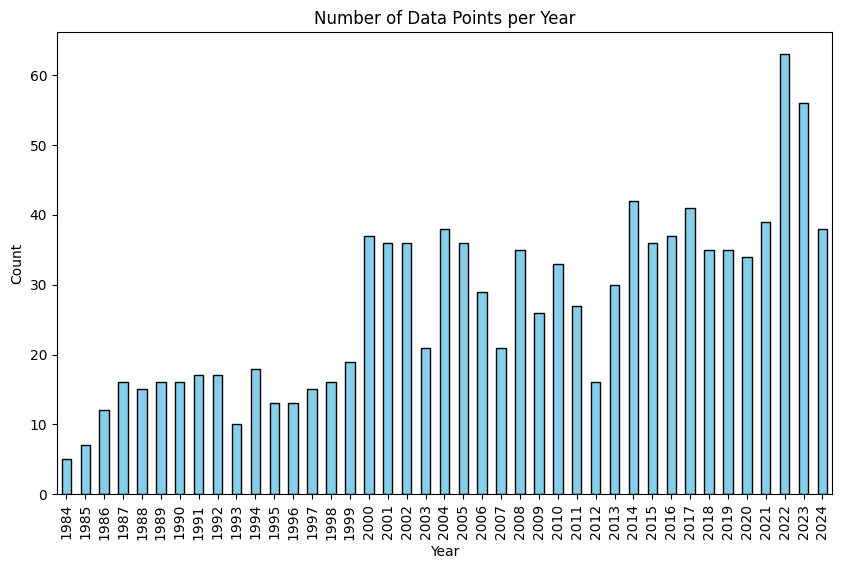

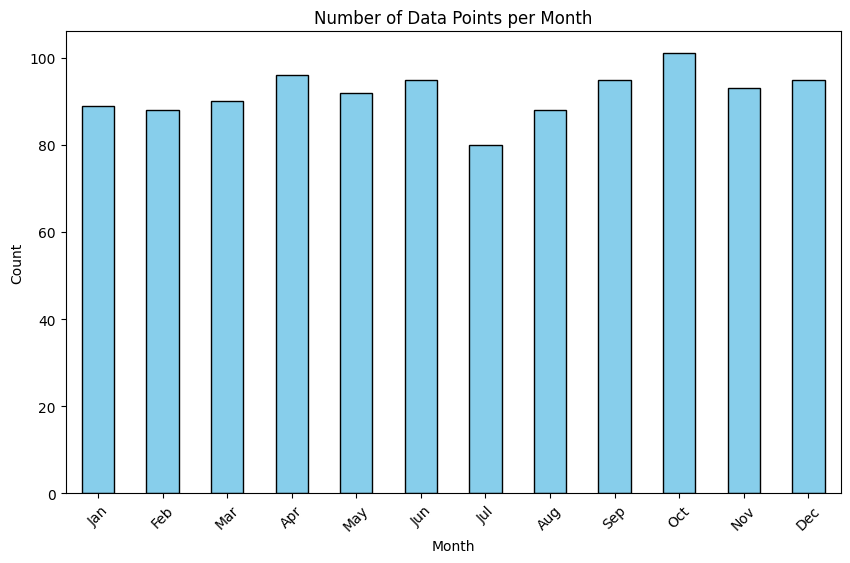

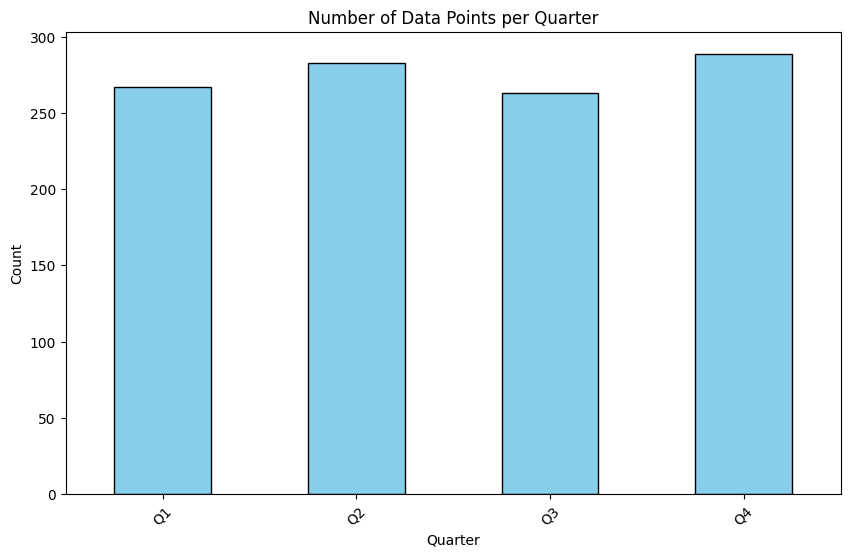

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
# 假设 ds 是已经加载的 xarray 数据集
# 提取时间字段（假设时间字段为 'time'）
time = pd.Series(ds_t_all['time'].values)

datetime_series = pd.Series(time)

# 输出转换后的结果
print(datetime_series)
# 1. 统计每年的数量直方图
# 通过提取时间的年份
year = time.dt.year
year_counts = year.value_counts()

# 绘制年份直方图
plt.figure(figsize=(10, 6))
year_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 2. 统计每月的数量直方图
# 提取月份
month = time.dt.month
month_counts = month.value_counts()

# 绘制月份直方图
plt.figure(figsize=(10, 6))
month_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Data Points per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# 3. 统计每个季度的数量直方图
# 提取季度
quarter = time.dt.quarter
quarter_counts = quarter.value_counts()

# 绘制季度直方图
plt.figure(figsize=(10, 6))
quarter_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Data Points per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4'], rotation=45)
plt.show()



0     1984-05-07 02:03:54.382
1     1984-05-23 02:04:24.032
2     1984-07-26 02:05:39.729
3     1984-08-27 02:06:35.924
4     1985-03-23 02:06:58.412
                ...          
612   2024-08-17 02:36:11.885
613   2024-09-02 02:36:19.170
614   2024-09-18 02:36:23.629
615   2024-10-04 02:36:30.541
616   2024-11-05 02:36:40.283
Length: 617, dtype: datetime64[ns]


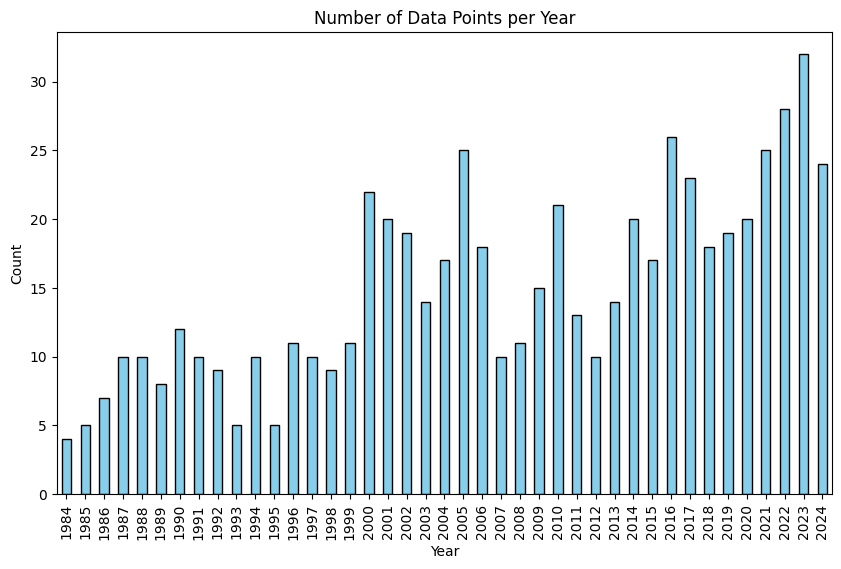

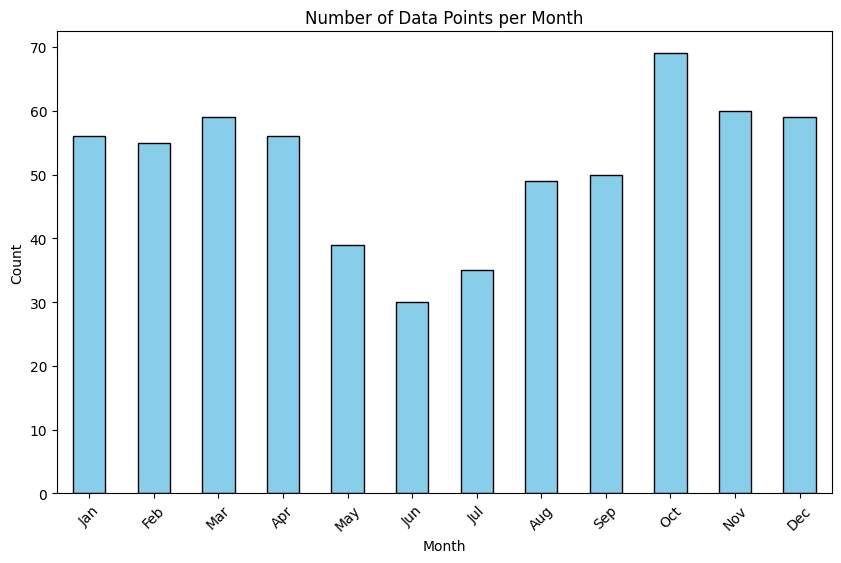

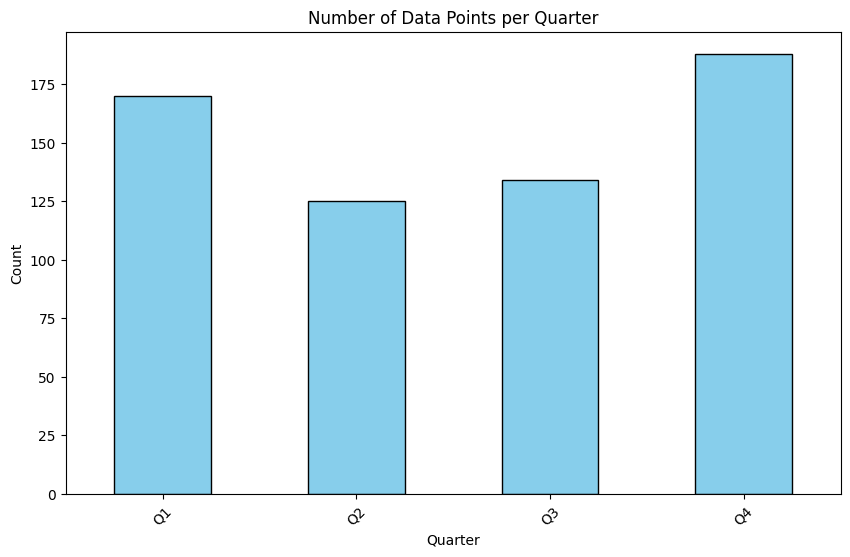

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
# 假设 ds 是已经加载的 xarray 数据集
# 提取时间字段（假设时间字段为 'time'）
time = pd.Series(ds_t_all['time'].values[~np.isnan(flat_arr)])

datetime_series = pd.Series(time)

# 输出转换后的结果
print(datetime_series)
# 1. 统计每年的数量直方图
# 通过提取时间的年份
year = time.dt.year
year_counts = year.value_counts()

# 绘制年份直方图
plt.figure(figsize=(10, 6))
year_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 2. 统计每月的数量直方图
# 提取月份
month = time.dt.month
month_counts = month.value_counts()

# 绘制月份直方图
plt.figure(figsize=(10, 6))
month_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Data Points per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# 3. 统计每个季度的数量直方图
# 提取季度
quarter = time.dt.quarter
quarter_counts = quarter.value_counts()

# 绘制季度直方图
plt.figure(figsize=(10, 6))
quarter_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Data Points per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4'], rotation=45)
plt.show()



In [97]:
longitude, latitude = 116.61, 35.62  # 替换为你的坐标
point = ee.Geometry.Point([longitude, latitude])

# 定义时间范围
start_date = '1984-01-01'
end_date = '2024-12-31'

# 反射率和温度校正参数
SR_SCALE_FACTOR = 0.0000275
SR_OFFSET = -0.2
TEMP_SCALE_FACTOR = 0.00341802
TEMP_OFFSET = 149.0

# 处理 Landsat 影像
def process_landsat(image, band_map):
    """ 先筛选水体像素，再计算反射率和温度 """

    # 筛选水体像素
    qa_pixel = image.select('QA_PIXEL')
    water_mask = qa_pixel.bitwiseAnd(1 << 7).neq(0)  # 水体
    cloud_mask = qa_pixel.bitwiseAnd(1 << 3).eq(0)   # 无云
    shadow_mask = qa_pixel.bitwiseAnd(1 << 4).eq(0)  # 无阴影
    water_only = image.updateMask(water_mask.And(cloud_mask).And(shadow_mask))

    # 服务器端重命名波段
    water_only = water_only.select(list(band_map.keys()), list(band_map.values()))

    # 反射率校正
    sr_bands = water_only.select(['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2'],).multiply(SR_SCALE_FACTOR).add(SR_OFFSET)

    # 温度校正（开尔文转摄氏度）
    temperature_celsius = water_only.select('Thermal').multiply(TEMP_SCALE_FACTOR).add(TEMP_OFFSET).subtract(273.15)
    #     # 避免NaN
    # water_only = water_only.updateMask(water_only.mask())
    # sr_bands = sr_bands.updateMask(water_only.mask())
    # temperature_celsius = temperature_celsius.updateMask(water_only.mask())

    return water_only.addBands(sr_bands.rename(['Blue_Rrs', 'Green_Rrs', 'Red_Rrs', 'NIR_Rrs', 'SWIR1_Rrs', 'SWIR2'])).addBands(temperature_celsius.rename('Temperature_Celsius'))

# 处理 Landsat 5
landsat5_band_map = {
    'SR_B1': 'Blue', 'SR_B2': 'Green', 'SR_B3': 'Red', 'SR_B4': 'NIR',
    'SR_B5': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B6': 'Thermal'
}
landsat5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat5_band_map))

# 处理 Landsat 7
landsat7_band_map = landsat5_band_map  # Landsat 5 和 7 波段相同
landsat7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat7_band_map))

# 处理 Landsat 8
landsat8_band_map = {
    'SR_B2': 'Blue', 'SR_B3': 'Green', 'SR_B4': 'Red', 'SR_B5': 'NIR',
    'SR_B6': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B10': 'Thermal'
}
landsat8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# 处理 Landsat 9
landsat9_band_map = landsat8_band_map  # Landsat 8 和 9 波段相同
landsat9 = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# # 合并所有 Landsat 影像
# landsat_collection = landsat5.merge(landsat7).merge(landsat8)
landsat_collection = landsat5.merge(landsat7).merge(landsat8).merge(landsat9)
ds_t_all = xarray.open_dataset(
   ee.ImageCollection(landsat_collection),
   engine='ee',
   scale=8.983e-6,
  #  crs='EPSG:4326',
  geometry=point ,
)
# ds_t_all
t = ds_t_all["Green"].values
flat_arr = t.ravel()  # 将多维数组压缩成一维

# ---------------------------------------------------
# 步骤 2：统计 NaN 数量
# ---------------------------------------------------
nan_count = np.isnan(flat_arr).sum()

# ---------------------------------------------------
# 步骤 3：统计有效数据中的 0 和 1 数量
# ---------------------------------------------------
valid_data = flat_arr[~np.isnan(flat_arr)]  # 过滤 NaN


# ---------------------------------------------------
# 步骤 4：输出统计结果
# ---------------------------------------------------
print(f"数值分布统计:")

print(f"- NaN 的数量: {nan_count}")
print(f"- 有效数据总数: {len(valid_data)}")
print(f"- 无效数据占比: {nan_count / len(flat_arr):.1%}")

数值分布统计:
- NaN 的数量: 1122
- 有效数据总数: 0
- 无效数据占比: 100.0%


In [92]:
ds_t_alls = xarray.open_dataset(
   ee.ImageCollection(landsat_collection),
  #  engine='ee',
   scale=8.983e-6,
  # #  crs='EPSG:4326',
  geometry=point ,
)
ds_t_alls

<xarray.Dataset> Size: 71kB
Dimensions:              (time: 1102, lon: 1, lat: 1)
Coordinates:
  * time                 (time) datetime64[ns] 9kB 1984-05-07T02:03:54.382000...
  * lon                  (lon) float64 8B 119.9
  * lat                  (lat) float64 8B 34.91
Data variables: (12/14)
    Blue                 (time, lon, lat) float32 4kB ...
    Green                (time, lon, lat) float32 4kB ...
    Red                  (time, lon, lat) float32 4kB ...
    NIR                  (time, lon, lat) float32 4kB ...
    SWIR1                (time, lon, lat) float32 4kB ...
    SWIR2                (time, lon, lat) float32 4kB ...
    ...                   ...
    Green_Rrs            (time, lon, lat) float32 4kB ...
    Red_Rrs              (time, lon, lat) float32 4kB ...
    NIR_Rrs              (time, lon, lat) float32 4kB ...
    SWIR1_Rrs            (time, lon, lat) float32 4kB ...
    SWIR2_1              (time, lon, lat) float32 4kB ...
    Temperature_Celsius  (time, lon, lat) float32 4kB ...
Attributes:
    crs:      EPSG:4326

In [90]:
ds_t_alls1 = ds_t_alls['Blue_Rrs'](dim='time', skipna=True)
ds_t_alls1.transpose().plot()

TypeError: 'DataArray' object is not callable

In [86]:
import cubo
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection=ee.ImageCollection(landsat_collection), # ee.ImageCollection object
    # bands=['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2'], # Bands to retrieve
    start_date='2021-06-01',
    end_date='2021-07-01', # End date of the cube (remember in GEE this date is not included)
    edge_size=64,
    resolution=30,
    gee=True # Set to True
)
da

TypeError: 'NoneType' object is not subscriptable

In [79]:
import cubo

ModuleNotFoundError: No module named 'cubo'

In [59]:
ds_t_all.to_netcdf(('./drive/MyDrive/tmp_xee.nc'))

KeyboardInterrupt: 

In [65]:
ds5 = xarray.open_dataset(
   ee.ImageCollection(landsat5),
   engine='ee',
   scale=0.001,
   crs='EPSG:4326',
  geometry=point ,
)

ds5['Blue'].values

array([[[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]]

In [48]:
# 目标经纬度
longitude, latitude = 110.0, 30.0  # 替换为你的坐标
point = ee.Geometry.Point([longitude, latitude])

# 定义时间范围
start_date = '1984-01-01'
end_date = '2024-12-31'

# 反射率和温度校正参数
SR_SCALE_FACTOR = 0.0000275
SR_OFFSET = -0.2
TEMP_SCALE_FACTOR = 0.00341802
TEMP_OFFSET = 149.0

# 处理 Landsat 影像的函数
def process_landsat(image, band_map):
    """ 先筛选水体像素，再计算反射率和温度 """
    qa_pixel = image.select('QA_PIXEL')
    water_mask = qa_pixel.bitwiseAnd(1 << 7).neq(0)  # 水体
    cloud_mask = qa_pixel.bitwiseAnd(1 << 3).eq(0)   # 无云
    shadow_mask = qa_pixel.bitwiseAnd(1 << 4).eq(0)  # 无阴影
    water_only = image.updateMask(water_mask.And(cloud_mask).And(shadow_mask))

    # 反射率校正
    sr_bands = water_only.select([band for band in band_map.keys()]).multiply(SR_SCALE_FACTOR).add(SR_OFFSET)

    # 温度校正（开尔文转摄氏度）
    temperature_celsius = water_only.select('Thermal').multiply(TEMP_SCALE_FACTOR).add(TEMP_OFFSET).subtract(273.15)

    return sr_bands.addBands(temperature_celsius.rename('Temperature_Celsius'))

# 处理 Landsat 5
landsat5_band_map = {
    'SR_B1': 'Blue', 'SR_B2': 'Green', 'SR_B3': 'Red', 'SR_B4': 'NIR',
    'SR_B5': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B6': 'Thermal'
}
landsat5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat5_band_map))

# 处理 Landsat 7
landsat7_band_map = landsat5_band_map  # Landsat 5 和 7 波段相同
landsat7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat7_band_map))

# 处理 Landsat 8
landsat8_band_map = {
    'SR_B2': 'Blue', 'SR_B3': 'Green', 'SR_B4': 'Red', 'SR_B5': 'NIR',
    'SR_B6': 'SWIR1', 'SR_B7': 'SWIR2', 'ST_B10': 'Thermal'
}
landsat8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat8_band_map))

# 处理 Landsat 9
landsat9_band_map = landsat8_band_map  # Landsat 8 和 9 波段相同
landsat9 = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate(start_date, end_date) \
    .map(lambda img: process_landsat(img, landsat9_band_map))

# 合并所有 Landsat 影像
landsat_collection = landsat5.merge(landsat7).merge(landsat8).merge(landsat9)
ds_t_all_v2 = xarray.open_dataset(
   ee.ImageCollection(landsat_collection),
   engine='ee',
   scale=0.001,
   crs='EPSG:4326',
  geometry=point ,
)
ds_t_all_v2

EEException: Collection.first: Error in map(ID=LT05_125039_19871010):
Image.select: Band pattern 'Thermal' did not match any bands. Available bands: [SR_B1, SR_B2, SR_B3, SR_B4, SR_B5, SR_B7, SR_ATMOS_OPACITY, SR_CLOUD_QA, ST_B6, ST_ATRAN, ST_CDIST, ST_DRAD, ST_EMIS, ST_EMSD, ST_QA, ST_TRAD, ST_URAD, QA_PIXEL, QA_RADSAT]

In [ ]:
!pip install zarr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.4/181.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# da.to_zarr('./drive/MyDrive/era5_mld_data_tmp.zarr')

/usr/local/lib/python3.11/dist-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/usr/local/lib/python3.11/dist-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/usr/local/lib/python3.11/dist-packages/zarr/api/asynchronous.py:197: UserWarning: Consolidated metadata is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# 加载ERA5 LAND数据集
S2 = (ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR")
      .filterBounds(ee.Geometry.Point(13.379491178028564, 47.848151988493385))
      .filterDate('1984-01-01', '1985-07-01')
)

# 日期列表
dates = ['1984-02-03', '1984-03-03', '1984-04-03', '1984-05-03']

# 定义一个函数来筛选给定时间列表的影像
def filter_by_date(image):
    date = ee.Date(image.get('system:time_start'))
    date_str = date.format('yyyy-MM-dd')

    # 检查影像的日期是否在给定日期列表中
    is_selected_date = ee.List(dates).contains(date_str)

    # 如果日期匹配，返回影像
    return ee.Algorithms.If(is_selected_date, image, None)

# 使用 map 函数应用过滤器
filtered_images = S2.map(filter_by_date)

# 将结果过滤掉 None
filtered_S2 = filtered_images.filter(ee.Filter.notNull(['system:index']))

# 打印筛选后的 ImageCollection
filtered_S2.getInfo()

# 使用cubo创建数据立方体
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection=filtered_S2, # ee.ImageCollection object
    bands=['lake_mix_layer_depth'], # Bands to retrieve
    start_date='1984-01-01',
    end_date='2025-07-01', # End date of the cube (remember in GEE this date is not included)
    edge_size=1,
    resolution=30,
    gee=True # Set to True
)
da

EEException: Error in map(ID=19840101):
Mapped algorithm returned null but dropNulls was set to false. Set dropNulls to true to drop elements for which the algorithm returns null.

In [ ]:
# Define the ImageCollection
S2 = ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR") \
    .filterBounds(ee.Geometry.Point(13.379491178028564, 47.848151988493385)) \
    .filterDate('1984-01-01', '1985-07-01')

# Define a list of specific dates within the range
date_list = [
    '1984-01-10', '1984-02-15', '1984-03-20',
    '1984-04-25', '1984-05-10', '1984-06-05'
]

# Function to filter the ImageCollection by specific dates
filtered_images = []

for date in date_list:
    # Filter for the specific date and get the first image of that day
    image = S2.filterDate(date, date).first()
    filtered_images.append(image)

# Convert the list of images back into an ImageCollection
new_S2 = ee.ImageCollection(filtered_images)
# 使用cubo创建数据立方体
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection=filtered_images[0], # ee.ImageCollection object
    bands=['lake_mix_layer_depth'], # Bands to retrieve
    start_date='1984-01-01',
    end_date='2025-07-01', # End date of the cube (remember in GEE this date is not included)
    edge_size=1,
    resolution=30,
    gee=True # Set to True
)
da

AttributeError: 'Image' object has no attribute 'filterBounds'

this is chathpt xee to mld era5

In [ ]:

import ee
service_account = 'shi-jiarui-dukekunshan@ee-shijiarui-dukekunshan.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, './drive/MyDrive/ee-shijiarui-dukekunshan-c6907bc45407.json')
ee.Initialize(credentials,opt_url='https://earthengine-highvolume.googleapis.com')

In [ ]:
import xarray as xr
pt = ee.Geometry.Point(120.0, 30.0)
era5_mld = (ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
    .select('lake_mix_layer_depth')
    .filterDate('1984', '2024'))
# 3. 使用 Xee 读取 ERA5 Daily 数据集
#    此处假定数据集ID为 'ee://ECMWF/ERA5_DAILY'，并指定感兴趣区域、坐标系和分辨率
ds = xr.open_dataset(era5_mld , engine='ee',
                       geometry=pt, crs='EPSG:4326')

# 4. 查看数据集结构，确认 MLD 变量名称
print(ds)

<xarray.Dataset> Size: 175kB
Dimensions:               (time: 14610, lon: 1, lat: 1)
Coordinates:
  * time                  (time) datetime64[ns] 117kB 1984-01-01 ... 2023-12-31
  * lon                   (lon) float64 8B 120.5
  * lat                   (lat) float64 8B 30.5
Data variables:
    lake_mix_layer_depth  (time, lon, lat) float32 58kB ...
Attributes:
    crs:      EPSG:4326


In [ ]:
ds.to_netcdf(('./drive/MyDrive/tmp.nc'))

ValueError: 3601 is not in list

In [ ]:
import xarray as xr

import numpy as np
import pandas as pd


# 定义目标点坐标
pt = ee.Geometry.Point(120.0, 30.0)

# 创建年份序列
years = np.arange(1984, 2024)

# 预定义数据集属性
crs = 'EPSG:4326'


# 创建空列表存储年度数据集
annual_datasets = []

# 分年度循环下载
for year in years:
    try:
        # 构造年度时间范围
        start_date = f'{year}-01-01'
        end_date = f'{year+1}-01-01' if year < 2023 else '2024-01-01'

        # 获取年度影像集
        era5_year = (ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
            .filterDate(start_date, end_date)
            .select('lake_mix_layer_depth'))

        # 转换为xarray数据集（使用Xee引擎）
        ds_year = xr.open_dataset(
            era5_year,
            engine='ee',
            geometry=pt,
            crs=crs,
        )

        # 添加年度数据到列表
        annual_datasets.append(ds_year)
        print(f"成功加载 {year} 年数据")

    except Exception as e:
        print(f"加载 {year} 年数据时出错: {str(e)}")
        continue

# 合并所有年度数据
if annual_datasets:
    # 沿时间维度拼接
    full_ds = xr.concat(annual_datasets, dim='time')

    # 按时间排序
    full_ds = full_ds.sortby('time')

    # 设置编码选项（优化存储）
    encoding = {
        'lake_mix_layer_depth': {
            'zlib': True,
            'complevel': 5,
            'dtype': 'float32'
        }
    }

    # 保存为NetCDF文件
    output_path = './drive/MyDrive/tmp.nc'
    full_ds.to_netcdf(output_path, encoding=encoding,engine='netcdf4')
    print(f"数据集已保存至 {output_path}")
else:
    print("无有效数据可合并")

成功加载 1984 年数据
成功加载 1985 年数据
成功加载 1986 年数据
成功加载 1987 年数据
成功加载 1988 年数据
成功加载 1989 年数据
成功加载 1990 年数据
成功加载 1991 年数据
成功加载 1992 年数据
成功加载 1993 年数据
成功加载 1994 年数据
成功加载 1995 年数据
成功加载 1996 年数据
成功加载 1997 年数据
成功加载 1998 年数据
成功加载 1999 年数据
成功加载 2000 年数据
成功加载 2001 年数据
成功加载 2002 年数据
成功加载 2003 年数据
成功加载 2004 年数据
成功加载 2005 年数据
成功加载 2006 年数据
成功加载 2007 年数据
成功加载 2008 年数据
成功加载 2009 年数据
成功加载 2010 年数据
成功加载 2011 年数据
成功加载 2012 年数据
成功加载 2013 年数据
成功加载 2014 年数据
成功加载 2015 年数据
成功加载 2016 年数据
成功加载 2017 年数据
成功加载 2018 年数据
成功加载 2019 年数据
成功加载 2020 年数据
成功加载 2021 年数据
成功加载 2022 年数据
成功加载 2023 年数据


ValueError: unexpected encoding for scipy backend: ['zlib', 'complevel']

In [ ]:
full_ds

<xarray.Dataset> Size: 175kB
Dimensions:               (time: 14610, lon: 1, lat: 1)
Coordinates:
  * time                  (time) datetime64[ns] 117kB 1984-01-01 ... 2023-12-31
  * lon                   (lon) float64 8B 120.5
  * lat                   (lat) float64 8B 30.5
Data variables:
    lake_mix_layer_depth  (time, lon, lat) float32 58kB 5.037 5.044 ... 5.679
Attributes:
    crs:      EPSG:4326

In [ ]:
df = pd.DataFrame({
        'time': full_ds.time.values,

        'mld': full_ds.lake_mix_layer_depth.values.flatten(),

    })
df

,time,mld
0,1984-01-01,5.036522
1,1984-01-02,5.043960
2,1984-01-03,5.137147
3,1984-01-04,5.105012
4,1984-01-05,5.044708
...,...,...
14605,2023-12-27,3.883113
14606,2023-12-28,4.240628
14607,2023-12-29,4.879358
14608,2023-12-30,4.960449


In [ ]:
full_ds.time.values

array(['1984-01-01T00:00:00.000000000', '1984-01-02T00:00:00.000000000',
       '1984-01-03T00:00:00.000000000', ...,
       '2023-12-29T00:00:00.000000000', '2023-12-30T00:00:00.000000000',
       '2023-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
full_ds.lake_mix_layer_depth.values.flatten()

array([5.036522, 5.04396 , 5.137147, ..., 4.879358, 4.960449, 5.678682],
      dtype=float32)

In [ ]:
# 提取 lake_mix_layer_depth 数据变量
new_ds = full_ds[['lake_mix_layer_depth']]

# 定义保存路径
output_path = 'lake_mix_layer_depth_tmp.nc'

# 保存为 NetCDF 文件
new_ds.to_netcdf(output_path)


ValueError: 3601 is not in list

In [ ]:
new_ds.array()

AttributeError: 'Dataset' object has no attribute 'array'

In [ ]:
mean_deg_c = (ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY_AGGR')
    .filterDate('1960', '2020')
    .select('temperature_2m')
    .mean()
    .subtract(273.15))

ds = xarray.open_dataset(
    ee.ImageCollection([mean_deg_c]),
    engine='ee',
    scale=1,
    crs='EPSG:4326',
    geometry=ee.Geometry.Rectangle([-180, -90, 180, 90]),
)

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import os
import xarray as xr
hydro_usa_point  = pd.read_csv('./drive/MyDrive/Hydro_lake_USA_1km2.csv')
# 指定输出目录
output_dir = './drive/MyDrive/ERA5_Data'
os.makedirs(output_dir, exist_ok=True)  # 如果目录不存在则创建

for index, row in tqdm(hydro_usa_point.iterrows(), total=len(hydro_usa_point), desc="Processing sites"):
  # 定义目标点坐标
  pt = ee.Geometry.Point(120.0, 30.0)

  # 创建年份序列
  years = np.arange(1984, 2024)

  # 预定义数据集属性
  crs = 'EPSG:4326'


  # 创建空列表存储年度数据集
  annual_datasets = []

  # 分年度循环下载
  for year in years:
      try:
          # 构造年度时间范围
          start_date = f'{year}-01-01'
          end_date = f'{year+1}-01-01' if year < 2023 else '2024-01-01'

          # 获取年度影像集
          era5_year = (ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
              .filterDate(start_date, end_date)
              .select('lake_mix_layer_depth'))

          # 转换为xarray数据集（使用Xee引擎）
          ds_year = xr.open_dataset(
              era5_year,
              engine='ee',
              geometry=pt,
              crs=crs,
          )

          # 添加年度数据到列表
          annual_datasets.append(ds_year)
          # print(f"成功加载 {year} 年数据")

      except Exception as e:
          print(f"加载 {year} 年数据时出错: {str(e)}")
          continue

  # 合并所有年度数据
  if annual_datasets:
      # 沿时间维度拼接
      full_ds = xr.concat(annual_datasets, dim='time')

      # 按时间排序
      full_ds = full_ds.sortby('time')
      df = pd.DataFrame({
          'time': full_ds.time.values,

          'mld': full_ds.lake_mix_layer_depth.values.flatten(),

      })
      site_no = row['Hylak_id']
      # df.to_csv("tmp.csv")
      # 创建空的 xarray Dataset
      ds = xr.Dataset()
      ds['time'] = ('time', df['time'])  # 添加时间变量
      ds['mld'] = ('time', df['mld'])  # 添加混合层深度变量

      output_file = os.path.join(output_dir, f'site_{site_no}_data.nc')

      # 保存到CSV文件
      # df.to_csv(output_file, index=False)
      df.to_netcdf(os.path.join(output_dir, f'site_{site_no}_data.nc'))
      print(f'站点 {site_no} 数据已保存到 {output_file}')


  break

Processing sites:   0%|          | 0/7857 [00:00<?, ?it/s]

站点 5 数据已保存到 ./drive/MyDrive/ERA5_Data/site_5_data.nc


In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import os
import xarray as xr
hydro_usa_point  = pd.read_csv('./drive/MyDrive/Hydro_lake_USA_1km2.csv')
log_file = './drive/MyDrive/processed_sites_mld.log'
# 指定输出目录
output_dir = './drive/MyDrive/ERA5_Data'
os.makedirs(output_dir, exist_ok=True)  # 如果目录不存在则创建
def load_last_processed(log_file):
    """读取日志文件的最后一个站点"""
    if os.path.exists(log_file):
        with open(log_file, 'r') as f:
            lines = f.readlines()
            if lines:
                return lines[-1].strip()  # 返回最后一行
    return None

def get_existing_files(output_folder):
    # 获取输出目录中的所有文件名
    return set(os.listdir(output_folder))

def update_processed_log(log_file, site_no):
    """将处理完成的站点写入日志"""
    with open(log_file, 'a') as f:
        f.write(f"{site_no}\n")
for index, row in tqdm(hydro_usa_point.iterrows(), total=len(hydro_usa_point), desc="Processing sites"):
  # 定义目标点坐标
  pt = ee.Geometry.Point(120.0, 30.0)

  # 创建年份序列
  years = np.arange(1984, 2024)

  # 预定义数据集属性
  crs = 'EPSG:4326'


  # 创建空列表存储年度数据集
  annual_datasets = []

  # 分年度循环下载
  for year in years:
      try:
          # 构造年度时间范围
          start_date = f'{year}-01-01'
          end_date = f'{year+1}-01-01' if year < 2023 else '2024-01-01'

          # 获取年度影像集
          era5_year = (ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
              .filterDate(start_date, end_date)
              .select('lake_mix_layer_depth'))

          # 转换为xarray数据集（使用Xee引擎）
          ds_year = xr.open_dataset(
              era5_year,
              engine='ee',
              geometry=pt,
              crs=crs,
          )

          # 添加年度数据到列表
          annual_datasets.append(ds_year)
          # print(f"成功加载 {year} 年数据")

      except Exception as e:
          print(f"加载 {year} 年数据时出错: {str(e)}")
          continue

  # 合并所有年度数据
  if annual_datasets:
      # 沿时间维度拼接
      full_ds = xr.concat(annual_datasets, dim='time')

      # 按时间排序
      full_ds = full_ds.sortby('time')
      df = pd.DataFrame({
          'time': full_ds.time.values,

          'mld': full_ds.lake_mix_layer_depth.values.flatten(),

      })
      site_no = row['Hylak_id']
      # df.to_csv("tmp.csv")
      # 创建空的 xarray Dataset
      ds = xr.Dataset()
      ds['time'] = ('time', df['time'])  # 添加时间变量
      ds['mld'] = ('time', df['mld'])  # 添加混合层深度变量

      output_file = os.path.join(output_dir, f'site_{site_no}_data.nc')

      # 保存到CSV文件
      # df.to_csv(output_file, index=False)
      ds.to_netcdf(os.path.join(output_dir, f'site_{site_no}_data.nc'))
      print(f'站点 {site_no} 数据已保存到 {output_file}')
      # 更新日志
      update_processed_log(log_file, site_no)

  # break

Processing sites:   0%|          | 0/7857 [00:00<?, ?it/s]

站点 5 数据已保存到 ./drive/MyDrive/ERA5_Data/site_5_data.nc
站点 6 数据已保存到 ./drive/MyDrive/ERA5_Data/site_6_data.nc


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import os
import xarray as xr
import ee

# 读取数据
hydro_usa_point = pd.read_csv('./drive/MyDrive/Hydro_lake_USA_1km2.csv')

# 日志文件路径
log_file = './drive/MyDrive/processed_sites_mld.log'

# 指定输出目录
output_dir = './drive/MyDrive/ERA5_Data'
os.makedirs(output_dir, exist_ok=True)  # 如果目录不存在则创建

def load_last_processed(log_file):
    """读取日志文件的最后一个站点"""
    if os.path.exists(log_file):
        with open(log_file, 'r') as f:
            lines = f.readlines()
            if lines:
                return lines[-1].strip()  # 返回最后一行
    return None

def update_processed_log(log_file, site_no):
    """将处理完成的站点写入日志"""
    with open(log_file, 'a') as f:
        f.write(f"{site_no}\n")

# 加载最后一个已处理的站点
last_processed_site = load_last_processed(log_file)

# 如果存在已处理的站点，找到其在数据中的位置
if last_processed_site:
    last_index = hydro_usa_point[hydro_usa_point['Hylak_id'] == int(last_processed_site)].index[0]
    print(f"上次处理到站点 {last_processed_site}，从下一个站点继续处理")
    hydro_usa_point = hydro_usa_point.iloc[last_index + 1:]  # 跳过已处理的部分
else:
    print("未找到已处理的站点，从头开始处理")

# 遍历每个站点
for index, row in tqdm(hydro_usa_point.iterrows(), total=len(hydro_usa_point), desc="Processing sites"):
    site_no = row['Hylak_id']  # 假设站点编号存储在 'Hylak_id' 列中

    # 定义目标点坐标
    pt = ee.Geometry.Point(row['Pour_long'], row['Pour_lat'])  # 假设 CSV 中有经度和纬度列

    # 创建年份序列
    years = np.arange(1984, 2024)

    # 预定义数据集属性
    crs = 'EPSG:4326'

    # 创建空列表存储年度数据集
    annual_datasets = []

    # 分年度循环下载
    for year in years:
        try:
            # 构造年度时间范围
            start_date = f'{year}-01-01'
            end_date = f'{year+1}-01-01' if year < 2023 else '2024-01-01'

            # 获取年度影像集
            era5_year = (ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
                .filterDate(start_date, end_date)
                .select('lake_mix_layer_depth'))

            # 转换为xarray数据集（使用Xee引擎）
            ds_year = xr.open_dataset(
                era5_year,
                engine='ee',
                geometry=pt,
                crs=crs,
            )

            # 添加年度数据到列表
            annual_datasets.append(ds_year)
            # print(f"成功加载 {year} 年数据")

        except Exception as e:
            print(f"加载 {year} 年数据时出错: {str(e)}")
            continue

    # 合并所有年度数据
    if annual_datasets:
        # 沿时间维度拼接
        full_ds = xr.concat(annual_datasets, dim='time')

        # 按时间排序
        full_ds = full_ds.sortby('time')
        df = pd.DataFrame({
            'time': full_ds.time.values,
            'mld': full_ds.lake_mix_layer_depth.values.flatten(),
        })

        # 创建空的 xarray Dataset
        ds = xr.Dataset()
        ds['time'] = ('time', df['time'])  # 添加时间变量
        ds['mld'] = ('time', df['mld'])  # 添加混合层深度变量

        # 保存到 NetCDF 文件
        output_file = os.path.join(output_dir, f'site_{site_no}_data.nc')
        ds.to_netcdf(output_file)
        print(f'站点 {site_no} 数据已保存到 {output_file}')

        # 更新日志
        update_processed_log(log_file, site_no)

print("所有站点处理完成。")

未找到已处理的站点，从头开始处理


Processing sites:   0%|          | 0/7857 [00:00<?, ?it/s]

站点 5 数据已保存到 ./drive/MyDrive/ERA5_Data/site_5_data.nc
站点 6 数据已保存到 ./drive/MyDrive/ERA5_Data/site_6_data.nc
站点 7 数据已保存到 ./drive/MyDrive/ERA5_Data/site_7_data.nc
站点 8 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8_data.nc
站点 9 数据已保存到 ./drive/MyDrive/ERA5_Data/site_9_data.nc
站点 61 数据已保存到 ./drive/MyDrive/ERA5_Data/site_61_data.nc
站点 62 数据已保存到 ./drive/MyDrive/ERA5_Data/site_62_data.nc
站点 65 数据已保存到 ./drive/MyDrive/ERA5_Data/site_65_data.nc
站点 67 数据已保存到 ./drive/MyDrive/ERA5_Data/site_67_data.nc
站点 68 数据已保存到 ./drive/MyDrive/ERA5_Data/site_68_data.nc
站点 69 数据已保存到 ./drive/MyDrive/ERA5_Data/site_69_data.nc
站点 713 数据已保存到 ./drive/MyDrive/ERA5_Data/site_713_data.nc
站点 715 数据已保存到 ./drive/MyDrive/ERA5_Data/site_715_data.nc
站点 718 数据已保存到 ./drive/MyDrive/ERA5_Data/site_718_data.nc
站点 719 数据已保存到 ./drive/MyDrive/ERA5_Data/site_719_data.nc
站点 721 数据已保存到 ./drive/MyDrive/ERA5_Data/site_721_data.nc
站点 722 数据已保存到 ./drive/MyDrive/ERA5_Data/site_722_data.nc
站点 723 数据已保存到 ./drive/MyDrive/ERA5_Data/site_723_data.nc
站点 724

站点 8680 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8680_data.nc
站点 8684 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8684_data.nc
站点 8689 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8689_data.nc
站点 8691 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8691_data.nc
站点 8701 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8701_data.nc
站点 8703 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8703_data.nc
站点 8704 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8704_data.nc
站点 8706 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8706_data.nc
站点 8708 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8708_data.nc
站点 8709 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8709_data.nc
站点 8710 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8710_data.nc


站点 8715 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8715_data.nc
站点 8716 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8716_data.nc
站点 8717 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8717_data.nc
站点 8718 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8718_data.nc
站点 8719 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8719_data.nc
站点 8723 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8723_data.nc
站点 8726 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8726_data.nc
站点 8729 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8729_data.nc
站点 8730 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8730_data.nc
站点 8731 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8731_data.nc
站点 8733 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8733_data.nc
站点 8736 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8736_data.nc
站点 8738 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8738_data.nc
站点 8740 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8740_data.nc
站点 8743 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8743_data.nc
站点 8744 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8744_data.nc
站点 8747 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8747_data.

站点 8768 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8768_data.nc
站点 8772 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8772_data.nc
站点 8773 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8773_data.nc
站点 8774 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8774_data.nc
站点 8775 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8775_data.nc
站点 8777 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8777_data.nc
站点 8783 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8783_data.nc
站点 8784 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8784_data.nc
站点 8786 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8786_data.nc
站点 8787 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8787_data.nc
站点 8789 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8789_data.nc
站点 8794 数据已保存到 ./drive/MyDrive/ERA5_Data/site_8794_data.nc


In [ ]:
hydro_usa_point

,OID_,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,...,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat
0,4,5,Superior,United States of America,North America,SWBD,1,0,81843.92,5248.36,...,0.0,1,146.699997,2869.953,48410.3,179,-1.00,209219.5,-84.460547,46.468593
1,5,6,Michigan,United States of America,North America,SWBD,1,0,57726.84,2862.67,...,0.0,1,84.199997,1877.753,29956.0,175,-1.00,176006.4,-84.753910,45.822916
2,6,7,Ontario,United States of America,North America,SWBD,3,1485,19347.36,2609.93,...,29960.0,1,84.800003,7745.819,2450.5,73,-1.00,766137.4,-75.794246,44.480557
3,7,8,Huron,United States of America,North America,SWBD,1,0,59399.30,8856.64,...,0.0,1,59.799999,9162.152,4484.5,175,-1.00,576017.7,-82.422576,42.999403
4,8,9,Erie,United States of America,North America,SWBD,1,0,25767.79,1935.52,...,0.0,1,19.400000,9796.883,589.5,172,-1.00,679903.4,-78.908084,42.904334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7852,115544,115545,,United States of America,North America,SWBD,1,0,1.63,6.93,...,0.0,3,1.400000,1.038,26.1,1,0.64,35.7,-65.763542,18.169610
7853,115556,115557,,United States of America,North America,SWBD,1,0,1.34,5.32,...,0.0,3,2.100000,0.078,413.9,3,1.05,4.3,-67.180294,18.127269
7854,115565,115566,,United States of America,North America,SWBD,2,2257,2.10,12.20,...,67.7,2,32.200001,0.858,913.2,160,5.08,56.1,-66.485417,18.102083
7855,115570,115571,,United States of America,North America,SWBD,1,0,1.06,8.95,...,0.0,3,12.700000,1.454,106.9,182,9.69,73.4,-66.578125,18.077821


In [ ]:
# 2. 读取 NLCD 数据
nlcd_landcover = ee.ImageCollection("projects/sat-io/open-datasets/USGS/ANNUAL_NLCD/LANDCOVER")

# 3. 获取最新的 NLCD 影像
latest_nlcd = nlcd_landcover.sort('system:time_start', False).first()

# 4. 打印影像信息
info = latest_nlcd.getInfo()
print(info)

{'type': 'Image', 'bands': [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [160000, 105000], 'crs': 'PROJCS["AEA        WGS84", \n  GEOGCS["WGS 84", \n    DATUM["WGS_1984", \n      SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], \n      AUTHORITY["EPSG","6326"]], \n    PRIMEM["Greenwich", 0.0], \n    UNIT["degree", 0.017453292519943295], \n    AXIS["Longitude", EAST], \n    AXIS["Latitude", NORTH], \n    AUTHORITY["EPSG","4326"]], \n  PROJECTION["Albers_Conic_Equal_Area"], \n  PARAMETER["central_meridian", -96.0], \n  PARAMETER["latitude_of_origin", 23.0], \n  PARAMETER["standard_parallel_1", 29.5], \n  PARAMETER["false_easting", 0.0], \n  PARAMETER["false_northing", 0.0], \n  PARAMETER["standard_parallel_2", 45.5], \n  UNIT["m", 1.0], \n  AXIS["Easting", EAST], \n  AXIS["Northing", NORTH]]', 'crs_transform': [30, 0, -2415585, 0, -30, 3314805]}], 'version': 1729918723639112, 'id': 'projects/sat-io/open-da

In [ ]:
import xarray as xr
nlcd_year = (ee.ImageCollection("projects/sat-io/open-datasets/USGS/ANNUAL_NLCD/LANDCOVER"))

# 转换为xarray数据集（使用Xee引擎）
ds_nlcd_ = xr.open_dataset(
    nlcd_year,
    engine='ee',
    # geometry=pt,
    # crs=crs,
)
ds_nlcd_

<xarray.Dataset> Size: 10MB
Dimensions:  (time: 39, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 312B 1985-01-01 1986-01-01 ... 2023-01-01
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    b1       (time, lon, lat) float32 10MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
t = ds_nlcd_.sel(lon=-119.5,lat=-40.5)
t

<xarray.Dataset> Size: 484B
Dimensions:  (time: 39)
Coordinates:
  * time     (time) datetime64[ns] 312B 1985-01-01 1986-01-01 ... 2023-01-01
    lon      float64 8B -119.5
    lat      float64 8B -40.5
Data variables:
    b1       (time) float32 156B ...
Attributes:
    crs:      EPSG:4326

In [ ]:
t.b1

<xarray.DataArray 'b1' (time: 39)> Size: 156B
[39 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 312B 1985-01-01 1986-01-01 ... 2023-01-01
    lon      float64 8B -119.5
    lat      float64 8B -40.5
Attributes:
    id:             b1
    data_type:      {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max'...
    dimensions:     [160000, 105000]
    crs:            EPSG:4326
    crs_transform:  [30, 0, -2415585, 0, -30, 3314805]

In [ ]:
t.b1.values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)